This paper employs the species richness method to study the linguistic consumption of AO3 readers. Traditionally, this method is widely used in biodiversity research; however, the concept of "species" can be interpreted in various ways, and such methods can be applied to research in different fields. 

In [29]:
>>> pip install copia

Note: you may need to restart the kernel to use updated packages.


In [30]:
import copia

print(dir(copia))


['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'abundance_barplot', 'abundance_histogram', 'accumulation_curve', 'ace', 'chao1', 'density_plot', 'diversity', 'egghe_proot', 'empirical_hill', 'empirical_richness', 'estimated_hill', 'estimators', 'evenness', 'evenness_plot', 'functional_attribute_diversity', 'hill_numbers', 'hill_plot', 'iChao1', 'jackknife', 'min_add_sample', 'minsample_diagnostic_plot', 'multi_kde_plot', 'plot', 'shared_richness', 'stats', 'survival_errorbar', 'utils']


Download all required packages

In [31]:
import glob
import os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.random.seed(543251) # control random seed

import copia.utils as u
from copia.estimators import *
from copia import hill_numbers
from copia.stats import survival_ratio
from copia.diversity import evenness
from copia.plot import accumulation_curve
from copia.plot import multi_kde_plot
from copia.plot import survival_errorbar
from copia.plot import evenness_plot
from copia.plot import density_plot
from copia.plot import hill_plot


plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['xtick.top'] = False
plt.rcParams['ytick.right'] = False
plt.rcParams['ytick.minor.left'] = False

Read related files

读取文件: /Users/josiechen/desktop/full data/Bahasa_Indonesia_df_fulldata.csv
读取文件: /Users/josiechen/desktop/full data/Português_brasileiro_df_fulldata.csv
读取文件: /Users/josiechen/desktop/full data/chinese_df_full data.csv
读取文件: /Users/josiechen/desktop/full data/english_df_full data.csv
读取文件: /Users/josiechen/desktop/full data/spain_df_full data.csv
    work_id         language  \
0  36657928  bahasaindonesia   
1  39800361  bahasaindonesia   
2  38560521  bahasaindonesia   
3  33877852  bahasaindonesia   
4  34639120  bahasaindonesia   

                                            username  
0  ['dianthus_peony', 'Reyan3779', 'CuddlyWorm', ...  
1  ['desirely', 'yukiko_junko', 'koobiers', 'agus...  
2  ['jiewyve', 'jeonfm', 'amoon93', 'chimchick13'...  
3  ['jinniesyubbie', 'Kopiahge', 'Seokjinieyoongi...  
4  ['pinkmakaroni', 'seductivekv', 'urtaeguk', 'T...  


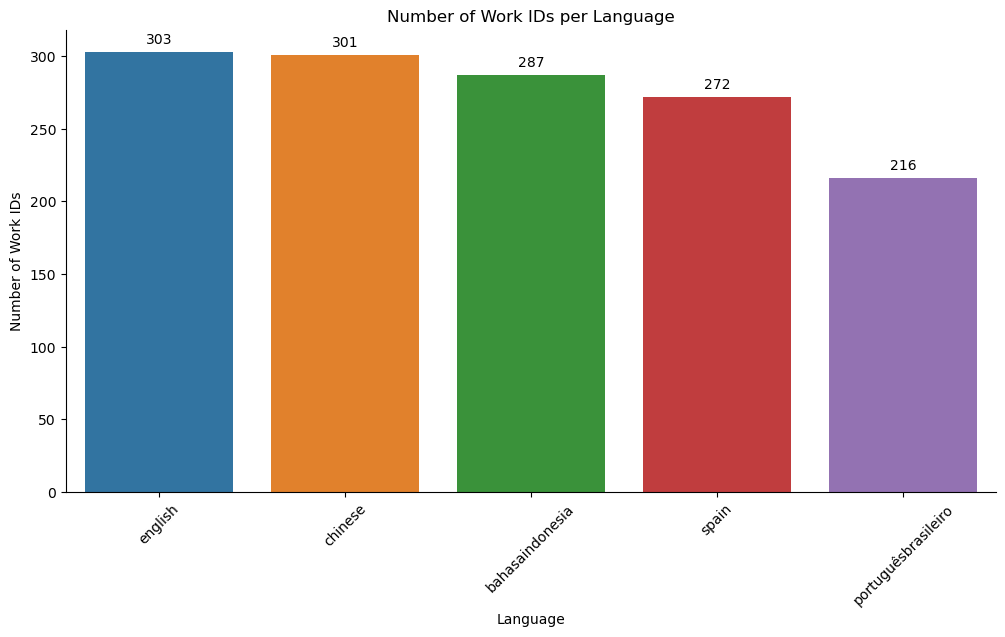

In [32]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns


all_data = []

for fn in sorted(glob.glob('/Users/josiechen/desktop/full data/*.csv')):

    df = pd.read_csv(fn)

    print(f"读取文件: {fn}")
    

    lang = os.path.basename(fn).replace('df_fulldata.csv', '').replace('.csv', '').replace('full data', '').replace('_', '').lower().replace('df', '')

    df['language'] = lang.strip()
    

    all_data.append(df)


all_data_df = pd.concat(all_data, ignore_index=True)


print(all_data_df.head())


language_work_id_counts = all_data_df.groupby('language')['work_id'].count().reset_index()
language_work_id_counts.columns = ['language', 'work_id_count']


plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=language_work_id_counts, x='language', y='work_id_count', order=language_work_id_counts.sort_values('work_id_count', ascending=False)['language'])
plt.title('Number of Work IDs per Language')
plt.xlabel('Language')
plt.ylabel('Number of Work IDs')
plt.xticks(rotation=45)


for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()


In [33]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns


lits = {}


for fn in sorted(glob.glob('/Users/josiechen/desktop/prepared data/*.csv')):
  
    if 'anglo-norman' in fn:
        continue
    
  
    df = pd.read_csv(fn)
    
 
    lang = os.path.basename(fn).replace('prepared data_', '').replace('.csv', '').lower()
    
 
    lits[lang] = df[['username', 'language', 'work_id']]


for lang, data in lits.items():
    print(f"Language: {lang}")
    print(data.head())


all_data = pd.concat(lits.values(), ignore_index=True)


print(all_data.head())




Language: bahasa_indonesia
          username          language   work_id
0   dianthus_peony  Bahasa Indonesia  36657928
1        Reyan3779  Bahasa Indonesia  36657928
2       CuddlyWorm  Bahasa Indonesia  36657928
3  jinkook_married  Bahasa Indonesia  36657928
4      agustDRkive  Bahasa Indonesia  36657928
Language: português_brasileiro
    username              language   work_id
0   nic_ckie  Português brasileiro  35195854
1   KimIsa15  Português brasileiro  32475397
2  velezhard  Português brasileiro  32475397
3   bunny445  Português brasileiro  32475397
4    Lunnary  Português brasileiro  32475397
Language: chinese
            username language   work_id
0           xiaowwai  chinese  40244955
1         kwonorange  chinese  40244955
2              EM_WX  chinese  40244955
3  mintchocolatemint  chinese  40244955
4      aaaaaaa_aaaaa  chinese  40244955
Language: english
        username language   work_id
0      camote_24  english  39739578
1       AdaoraKi  english  39739578
2  end

Calculate the values of f1, f2, S, and n

In [34]:

def to_abundance(series):
    
    return series.value_counts().to_dict()

def basic_stats(abundance):
 
    s = {
        'f1': sum(1 for count in abundance.values() if count == 1),
        'f2': sum(1 for count in abundance.values() if count == 2),
        'S': len(abundance),
        'n': sum(abundance.values())
    }
    return s


stats = []
for lit, df in lits.items():
    abundance = to_abundance(df['work_id'])
    s = basic_stats(abundance)
    d = {'language': lit}
    for k in ('f1', 'f2', 'S', 'n'):
        d[k] = s[k]
    d['repo'] = len(set(df['username']))
    stats.append(d)


print(stats)


[{'language': 'bahasa_indonesia', 'f1': 34, 'f2': 31, 'S': 287, 'n': 3505, 'repo': 1398}, {'language': 'português_brasileiro', 'f1': 79, 'f2': 47, 'S': 216, 'n': 871, 'repo': 589}, {'language': 'chinese', 'f1': 32, 'f2': 40, 'S': 301, 'n': 2371, 'repo': 885}, {'language': 'english', 'f1': 2, 'f2': 3, 'S': 303, 'n': 54772, 'repo': 32731}, {'language': 'spain', 'f1': 23, 'f2': 36, 'S': 272, 'n': 3759, 'repo': 2389}]


Use dataframe for display

In [35]:

stats_df = pd.DataFrame(stats)

stats_df['language'] = stats_df['language'].str.lower()


total_row = ['all'] + list(stats_df[['f1', 'f2', 'S', 'n']].sum()) + [None]
stats_df.loc[len(stats_df)] = total_row


stats_df = stats_df.set_index('language')

print(stats_df)


                        f1   f2     S      n   repo
language                                           
bahasa_indonesia        34   31   287   3505   1398
português_brasileiro   79   47   216    871    589
chinese                 32   40   301   2371    885
english                  2    3   303  54772  32731
spain                   23   36   272   3759   2389
all                    170  157  1379  65278   None


# Calculate the proportion of f1 and fe to the total S

               language   f1   f2     S     ratio
0      bahasa_indonesia   34   31   287  0.226481
1  português_brasileiro   79   47   216  0.583333
2               chinese   32   40   301  0.239203
3               english    2    3   303  0.016502
4                 spain   23   36   272  0.216912
5                   all  170  157  1379  0.237128


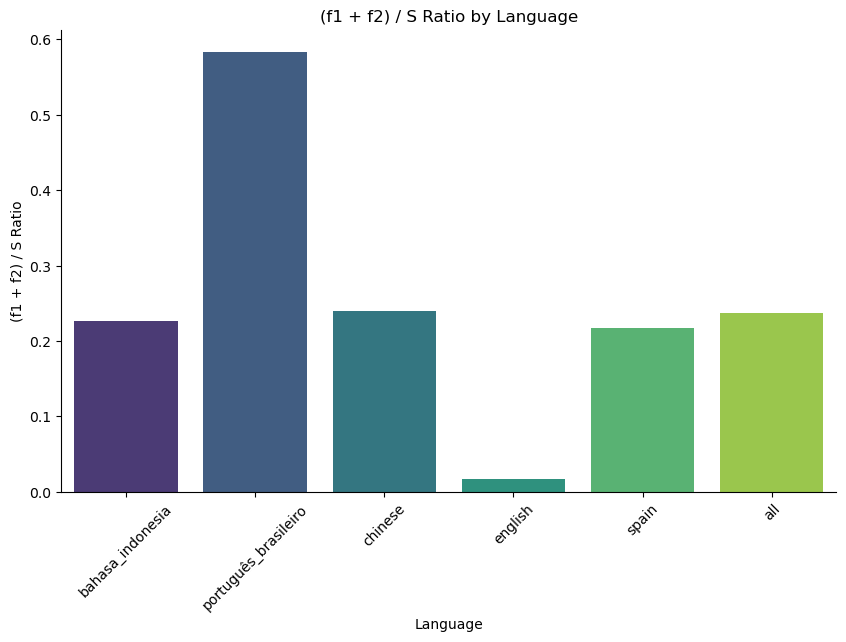

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = {
    'language': ['bahasa_indonesia', 'português_brasileiro', 'chinese', 'english', 'spain', 'all'],
    'f1': [34, 79, 32, 2, 23, 170],
    'f2': [31, 47, 40, 3, 36, 157],
    'S': [287, 216, 301, 303, 272, 1379],
    'n': [3505, 871, 2371, 54772, 3759, 65278]
}


df = pd.DataFrame(data)


df['ratio'] = (df['f1'] + df['f2']) / df['S']


print(df[['language', 'f1', 'f2', 'S', 'ratio']])

plt.figure(figsize=(10, 6))
sns.barplot(x='language', y='ratio', data=df, palette="viridis")
plt.xlabel('Language')
plt.ylabel('(f1 + f2) / S Ratio')
plt.title('(f1 + f2) / S Ratio by Language')
plt.xticks(rotation=45)
plt.show()


# Statistics on the proportion of users who can read multiple languages

In [37]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns


all_data = []

for fn in sorted(glob.glob('/Users/josiechen/desktop/prepared data/*.csv')):
  
    if 'anglo-norman' in fn:
        continue
   
    df = pd.read_csv(fn)
    
   
    all_data.append(df[['username', 'language', 'work_id']])


combined_df = pd.concat(all_data, ignore_index=True)


user_lang_counts = combined_df.groupby('username')['language'].nunique()


lang_reading_stats = user_lang_counts.value_counts().sort_index()


for num_languages, num_users in lang_reading_stats.items():
    print(f"Number of users who can read {num_languages} language(s): {num_users}")


Number of users who can read 1 language(s): 34566
Number of users who can read 2 language(s): 1437
Number of users who can read 3 language(s): 155
Number of users who can read 4 language(s): 18
Number of users who can read 5 language(s): 3


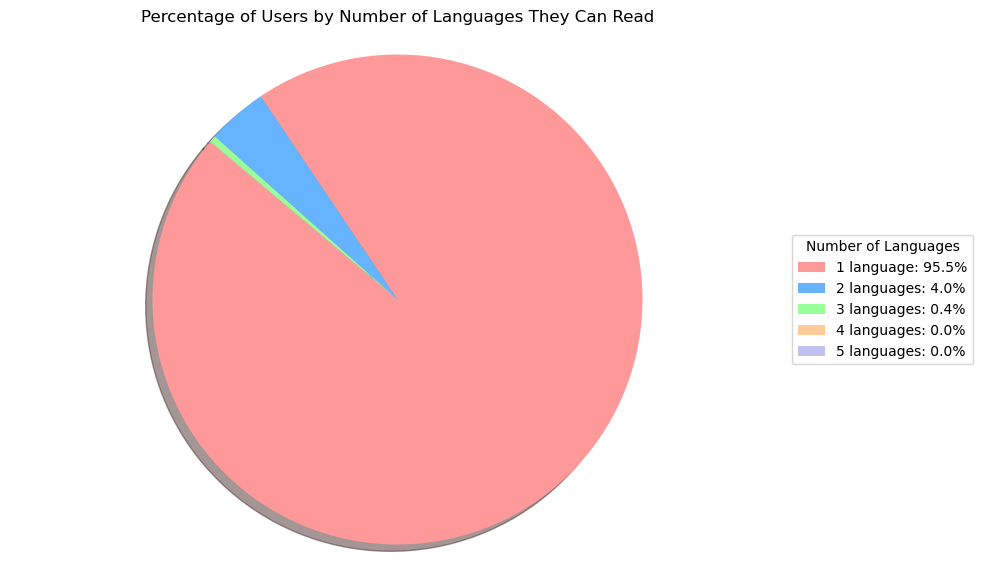

In [38]:
import matplotlib.pyplot as plt


labels = ['1 language', '2 languages', '3 languages', '4 languages', '5 languages']
sizes = [34566, 1437, 155, 18, 3]


colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']


percentages = [size / sum(sizes) * 100 for size in sizes]


plt.figure(figsize=(10, 7))
wedges, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=140, textprops=dict(color="w"))


legend_labels = [f'{label}: {percentage:.1f}%' for label, percentage in zip(labels, percentages)]


plt.legend(wedges, legend_labels, title="Number of Languages", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


plt.title('Percentage of Users by Number of Languages They Can Read')


plt.axis('equal')  
plt.show()


# Statistics on English readers' reading ability in other languages

Percentage of users who read English articles and also read other languages: 4.79%


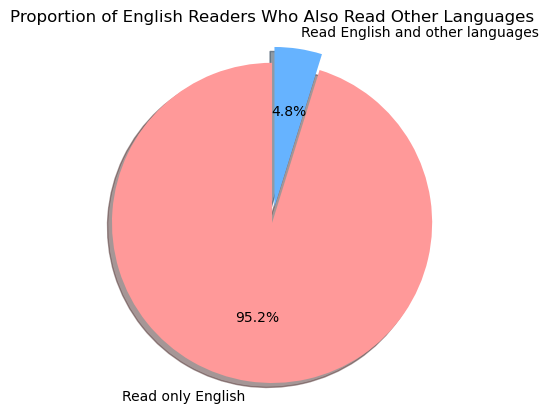

In [39]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns


lits = {}


for fn in sorted(glob.glob('/Users/josiechen/desktop/prepared data/*.csv')):
   
    if 'anglo-norman' in fn:
        continue
    
  
    df = pd.read_csv(fn)
    
    
    lang = os.path.basename(fn).replace('prepared data_', '').replace('.csv', '').lower()
    
    
    lits[lang] = df[['username', 'language', 'work_id']]


all_data = pd.concat(lits.values(), ignore_index=True)


user_lang_counts = all_data.groupby('username')['language'].nunique()


english_readers = all_data[all_data['language'] == 'english']['username'].unique()


other_lang_readers_count = user_lang_counts.loc[english_readers][user_lang_counts.loc[english_readers] > 1].count()
total_english_readers_count = len(english_readers)


other_lang_readers_percentage = (other_lang_readers_count / total_english_readers_count) * 100


print(f"Percentage of users who read English articles and also read other languages: {other_lang_readers_percentage:.2f}%")


labels = ['Read only English', 'Read English and other languages']
sizes = [100 - other_lang_readers_percentage, other_lang_readers_percentage]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Proportion of English Readers Who Also Read Other Languages')
plt.show()


# Statistics on the reading ability of readers of a specific language in other languages

Percentage of users who read English articles and also read other languages: 4.79%
Percentage of users who read Bahasa indonesia articles and also read other languages: 33.40%
Percentage of users who read Português brasileiro articles and also read other languages: 39.90%
Percentage of users who read Chinese articles and also read other languages: 15.59%
Percentage of users who read Spain articles and also read other languages: 42.57%


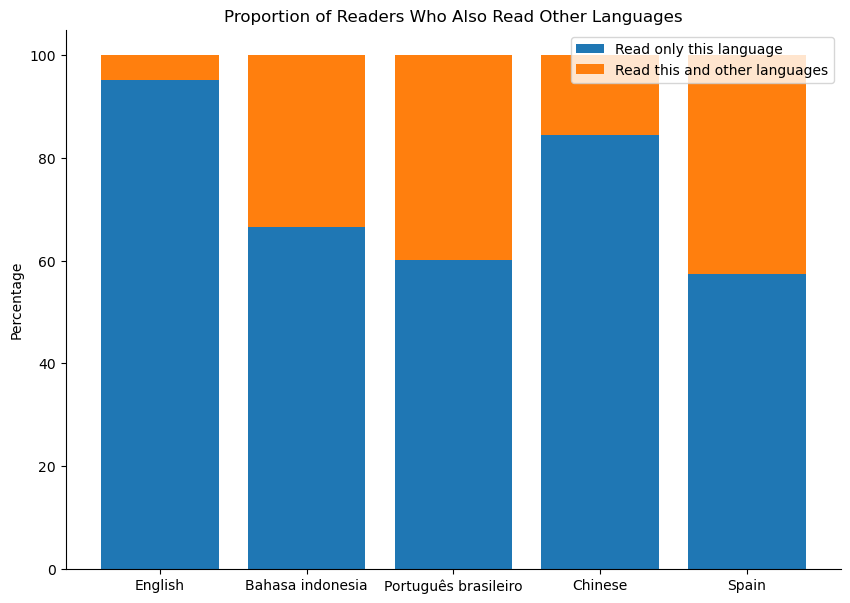

In [58]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns


lits = {}


for fn in sorted(glob.glob('/Users/josiechen/desktop/prepared data/*.csv')):
    
    if 'anglo-norman' in fn:
        continue
    
    
    df = pd.read_csv(fn)
    
    
    lang = os.path.basename(fn).replace('prepared data_', '').replace('.csv', '').lower()
    
    
    lits[lang] = df[['username', 'language', 'work_id']]


all_data = pd.concat(lits.values(), ignore_index=True)


user_lang_counts = all_data.groupby('username')['language'].nunique()


languages_of_interest = ['english', 'Bahasa Indonesia', 'Português brasileiro', 'chinese', 'spain']


language_proportions = {}

for lang in languages_of_interest:
   
    readers = all_data[all_data['language'] == lang]['username'].unique()
    
    
    other_lang_readers_count = user_lang_counts.loc[readers][user_lang_counts.loc[readers] > 1].count()
    total_readers_count = len(readers)
    
    
    other_lang_readers_percentage = (other_lang_readers_count / total_readers_count) * 100
    language_proportions[lang] = other_lang_readers_percentage


for lang, percentage in language_proportions.items():
    print(f"Percentage of users who read {lang.capitalize()} articles and also read other languages: {percentage:.2f}%")


labels = [lang.capitalize() for lang in languages_of_interest]
sizes = [100 - language_proportions[lang] for lang in languages_of_interest]
other_sizes = [language_proportions[lang] for lang in languages_of_interest]

fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(labels, sizes, label='Read only this language')
ax.bar(labels, other_sizes, bottom=sizes, label='Read this and other languages')
ax.set_ylabel('Percentage')
ax.set_title('Proportion of Readers Who Also Read Other Languages')
ax.legend()

plt.show()


In [69]:
import pandas as pd
import glob
import os


lits = {}


for fn in sorted(glob.glob('/Users/josiechen/desktop/prepared data/*.csv')):
   
    if 'anglo-norman' in fn:
        continue
    
   
    df = pd.read_csv(fn)
    
    
    lang = os.path.basename(fn).replace('prepared data_', '').replace('.csv', '').lower()
    
   
    lits[lang] = df[['username', 'language', 'work_id']]


all_data = pd.concat(lits.values(), ignore_index=True)


user_lang_counts = all_data.groupby('username')['language'].nunique()


languages_of_interest = ['english', 'Bahasa Indonesia', 'Português brasileiro', 'chinese', 'spain']


language_proportions = {}


for lang in languages_of_interest:
    
    readers = all_data[all_data['language'] == lang]['username'].unique()
    
    
    other_lang_readers = all_data[(all_data['username'].isin(readers)) & (all_data['language'] != lang)]['username'].unique()
    other_lang_readers_count = user_lang_counts.loc[other_lang_readers][user_lang_counts.loc[other_lang_readers] > 1].count()
    total_readers_count = len(readers)
    
    
    if total_readers_count != 0:
        other_lang_readers_percentage = (other_lang_readers_count / total_readers_count) * 100
    else:
        other_lang_readers_percentage = 0
    
    language_proportions[lang] = other_lang_readers_percentage


for lang, percentage in language_proportions.items():
    print(f"Percentage of users who read {lang.capitalize()} articles and also read other languages: {percentage:.2f}%")


Percentage of users who read English articles and also read other languages: 4.79%
Percentage of users who read Bahasa indonesia articles and also read other languages: 33.40%
Percentage of users who read Português brasileiro articles and also read other languages: 39.90%
Percentage of users who read Chinese articles and also read other languages: 15.59%
Percentage of users who read Spain articles and also read other languages: 42.57%


# Statistics on Chinese readers' reading ability in other languages

Percentage of Chinese readers who also read english: 14.12%
Percentage of Chinese readers who also read Bahasa Indonesia: 2.94%
Percentage of Chinese readers who also read Português brasileiro: 1.69%
Percentage of Chinese readers who also read spain: 4.29%


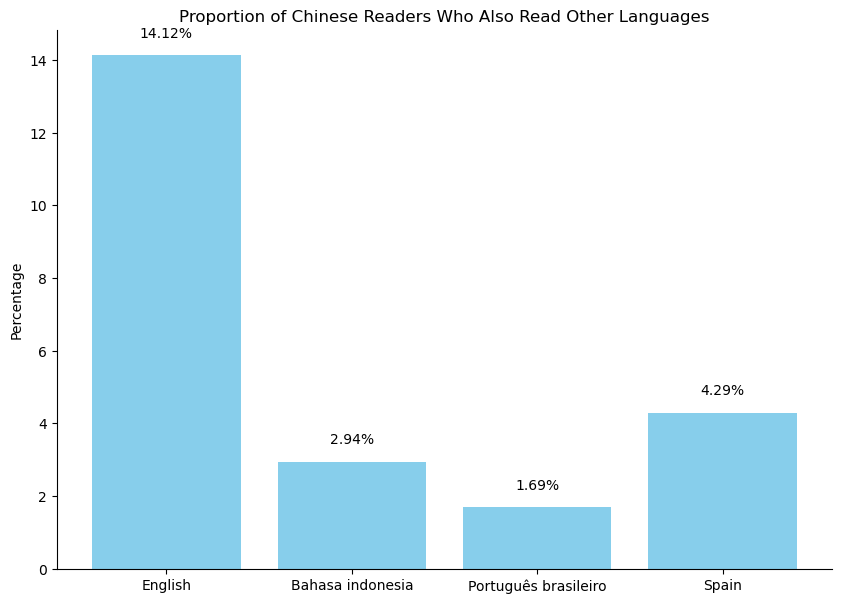

In [66]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt


lits = {}


for fn in sorted(glob.glob('/Users/josiechen/desktop/prepared data/*.csv')):
    
    if 'anglo-norman' in fn:
        continue
    
    
    df = pd.read_csv(fn)
    
  
    lang = os.path.basename(fn).replace('prepared data_', '').replace('.csv', '').lower()
    
   
    lits[lang] = df[['username', 'language', 'work_id']]

all_data = pd.concat(lits.values(), ignore_index=True)


chinese_readers = all_data[all_data['language'] == 'chinese']['username'].unique()


chinese_reader_proportions = {}


other_languages = ['english', 'Bahasa Indonesia', 'Português brasileiro', 'spain']


for lang in other_languages:
    
    other_lang_readers = all_data[(all_data['username'].isin(chinese_readers)) & (all_data['language'] == lang)]['username'].unique()
    other_lang_readers_count = len(other_lang_readers)
    total_chinese_readers_count = len(chinese_readers)
    
   
    if total_chinese_readers_count != 0:
        other_lang_readers_percentage = (other_lang_readers_count / total_chinese_readers_count) * 100
    else:
        other_lang_readers_percentage = 0
    
    chinese_reader_proportions[lang] = other_lang_readers_percentage


for lang, percentage in chinese_reader_proportions.items():
    print(f"Percentage of Chinese readers who also read {lang}: {percentage:.2f}%")


labels = [lang.capitalize() for lang in other_languages]
sizes = [chinese_reader_proportions[lang] for lang in other_languages]

fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(labels, sizes, color='skyblue')
ax.set_ylabel('Percentage')
ax.set_title('Proportion of Chinese Readers Who Also Read Other Languages')

for i in range(len(labels)):
    ax.text(i, sizes[i] + 0.5, f"{sizes[i]:.2f}%", ha='center')

plt.show()


# Statistics on Spanish readers' reading ability in other languages

Percentage of Spanish readers who also read English articles: 41.15%
Percentage of Spanish readers who also read Bahasa indonesia articles: 4.35%
Percentage of Spanish readers who also read Português brasileiro articles: 2.85%
Percentage of Spanish readers who also read Chinese articles: 1.59%


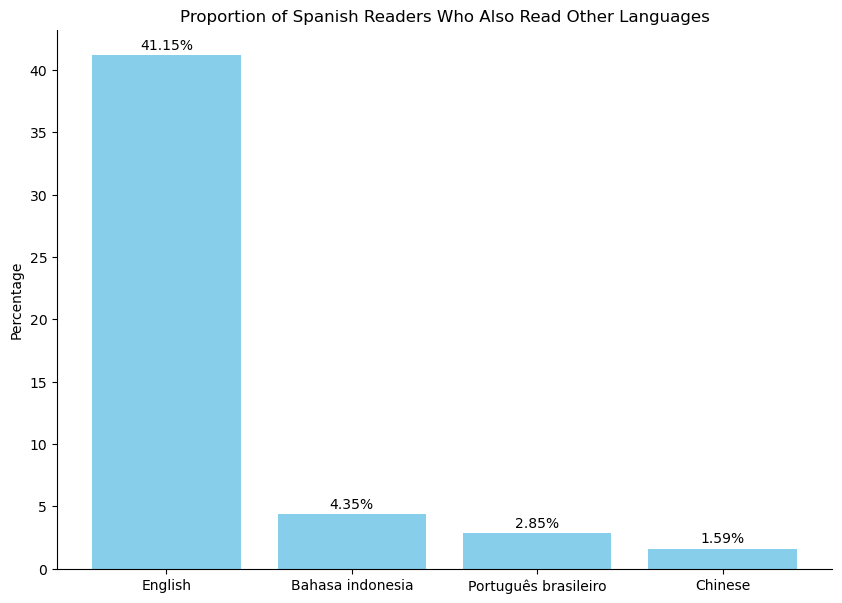

In [45]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt


lits = {}


for fn in sorted(glob.glob('/Users/josiechen/desktop/prepared data/*.csv')):
   
    if 'anglo-norman' in fn:
        continue
    

    df = pd.read_csv(fn)
    
  
    lang = os.path.basename(fn).replace('prepared data_', '').replace('.csv', '').lower()
    
    
    lits[lang] = df[['username', 'language', 'work_id']]


all_data = pd.concat(lits.values(), ignore_index=True)


spanish_readers = all_data[all_data['language'] == 'spain']['username'].unique()


spanish_reader_proportions = {}


other_languages = ['english', 'Bahasa Indonesia', 'Português brasileiro', 'chinese']


for lang in other_languages:

    other_lang_readers = all_data[(all_data['username'].isin(spanish_readers)) & (all_data['language'] == lang)]['username'].unique()
    other_lang_readers_count = len(other_lang_readers)
    total_spanish_readers_count = len(spanish_readers)
    

    other_lang_readers_percentage = (other_lang_readers_count / total_spanish_readers_count) * 100
    spanish_reader_proportions[lang] = other_lang_readers_percentage


for lang, percentage in spanish_reader_proportions.items():
    print(f"Percentage of Spanish readers who also read {lang.capitalize()} articles: {percentage:.2f}%")


labels = [lang.capitalize() for lang in other_languages]
sizes = [spanish_reader_proportions[lang] for lang in other_languages]

fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(labels, sizes, color='skyblue')
ax.set_ylabel('Percentage')
ax.set_title('Proportion of Spanish Readers Who Also Read Other Languages')

for i in range(len(labels)):
    ax.text(i, sizes[i] + 0.5, f"{sizes[i]:.2f}%", ha='center')

plt.show()


# Statistics on English readers' reading ability in other languages

Percentage of English readers who also read Spain articles: 3.00%
Percentage of English readers who also read Bahasa indonesia articles: 1.35%
Percentage of English readers who also read Português brasileiro articles: 0.66%
Percentage of English readers who also read Chinese articles: 0.38%


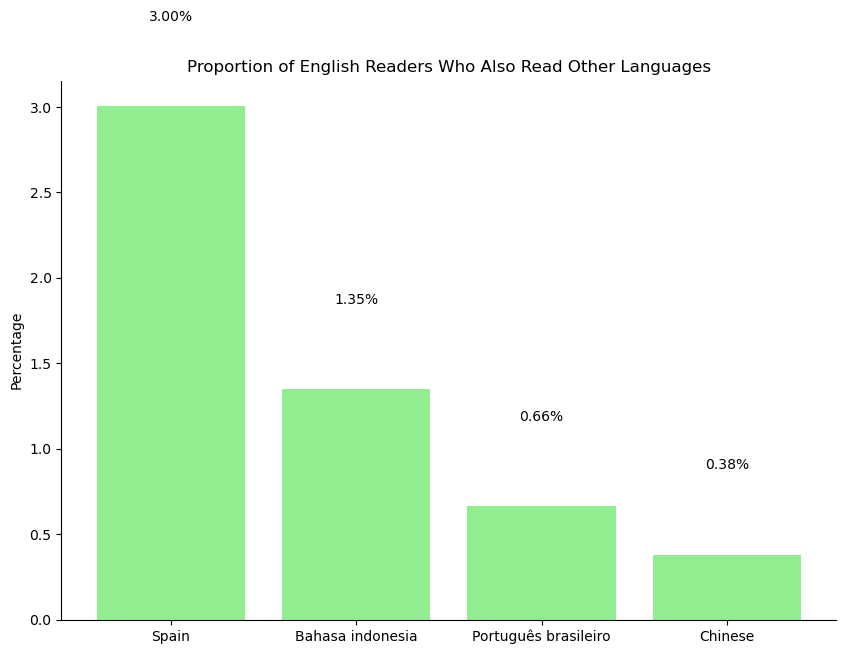

In [53]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

lits = {}


for fn in sorted(glob.glob('/Users/josiechen/desktop/prepared data/*.csv')):
   

    if 'anglo-norman' in fn:
        continue
    

    df = pd.read_csv(fn)
    

    lang = os.path.basename(fn).replace('prepared data_', '').replace('.csv', '').lower()
    

    lits[lang] = df[['username', 'language', 'work_id']]


all_data = pd.concat(lits.values(), ignore_index=True)

english_readers = all_data[all_data['language'] == 'english']['username'].unique()


english_reader_proportions = {}


other_languages = ['spain', 'Bahasa Indonesia', 'Português brasileiro', 'chinese']


for lang in other_languages:

    other_lang_readers = all_data[(all_data['username'].isin(english_readers)) & (all_data['language'] == lang)]['username'].unique()
    other_lang_readers_count = len(other_lang_readers)
    total_english_readers_count = len(english_readers)
    
  
    other_lang_readers_percentage = (other_lang_readers_count / total_english_readers_count) * 100
    english_reader_proportions[lang] = other_lang_readers_percentage


for lang, percentage in english_reader_proportions.items():
    print(f"Percentage of English readers who also read {lang.capitalize()} articles: {percentage:.2f}%")


labels = [lang.capitalize() for lang in other_languages]
sizes = [english_reader_proportions[lang] for lang in other_languages]

fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(labels, sizes, color='lightgreen')
ax.set_ylabel('Percentage')
ax.set_title('Proportion of English Readers Who Also Read Other Languages')

for i in range(len(labels)):
    ax.text(i, sizes[i] + 0.5, f"{sizes[i]:.2f}%", ha='center')

plt.show()


# Statistics on Portuguese readers' reading ability in other languages

Percentage of Portuguese readers who also read English articles: 36.84%
Percentage of Portuguese readers who also read Spain articles: 11.54%
Percentage of Portuguese readers who also read Bahasa Indonesia articles: 3.90%
Percentage of Portuguese readers who also read Chinese articles: 2.55%


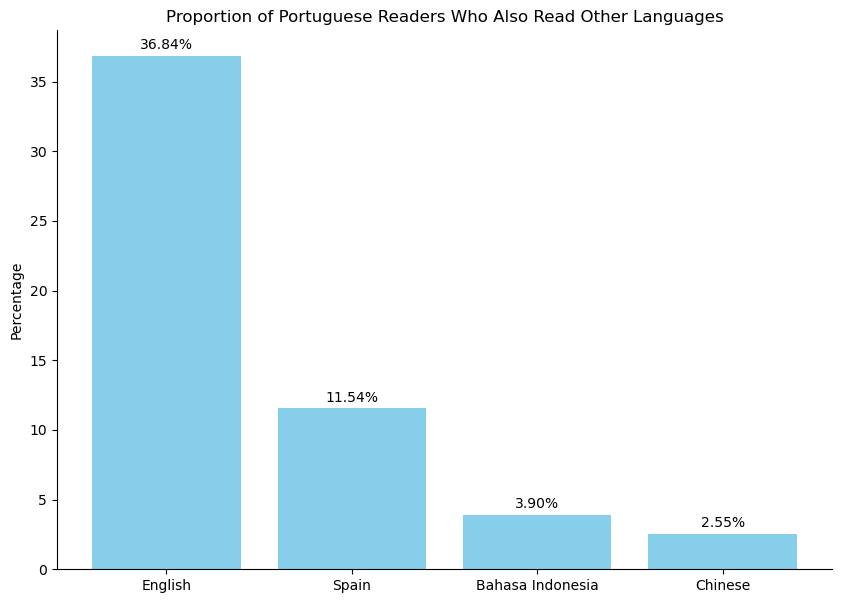

In [48]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt


lits = {}


for fn in sorted(glob.glob('/Users/josiechen/desktop/prepared data/*.csv')):
    
    if 'anglo-norman' in fn:
        continue
    

    df = pd.read_csv(fn)
    

    lang = os.path.basename(fn).replace('prepared data_', '').replace('.csv', '').lower()
    

    lits[lang] = df[['username', 'language', 'work_id']]


all_data = pd.concat(lits.values(), ignore_index=True)


portuguese_readers = all_data[all_data['language'] == 'Português brasileiro']['username'].unique()


portuguese_reader_proportions = {}


other_languages = ['english', 'spain', 'Bahasa Indonesia', 'chinese']


for lang in other_languages:
    
    other_lang_readers = all_data[(all_data['username'].isin(portuguese_readers)) & (all_data['language'] == lang)]['username'].unique()
    other_lang_readers_count = len(other_lang_readers)
    total_portuguese_readers_count = len(portuguese_readers)
    
    other_lang_readers_percentage = (other_lang_readers_count / total_portuguese_readers_count) * 100
    portuguese_reader_proportions[lang] = other_lang_readers_percentage


for lang, percentage in portuguese_reader_proportions.items():
    print(f"Percentage of Portuguese readers who also read {lang.replace('_', ' ').title()} articles: {percentage:.2f}%")


labels = [lang.replace('_', ' ').title() for lang in other_languages]
sizes = [portuguese_reader_proportions[lang] for lang in other_languages]

fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(labels, sizes, color='skyblue')
ax.set_ylabel('Percentage')
ax.set_title('Proportion of Portuguese Readers Who Also Read Other Languages')

for i in range(len(labels)):
    ax.text(i, sizes[i] + 0.5, f"{sizes[i]:.2f}%", ha='center')

plt.show()


# Statistics on Indonesian readers' reading ability in other languages

Percentage of Bahasa Indonesia readers who also read English articles: 31.55%
Percentage of Bahasa Indonesia readers who also read Spain articles: 7.44%
Percentage of Bahasa Indonesia readers who also read Português Brasileiro articles: 1.65%
Percentage of Bahasa Indonesia readers who also read Chinese articles: 1.86%


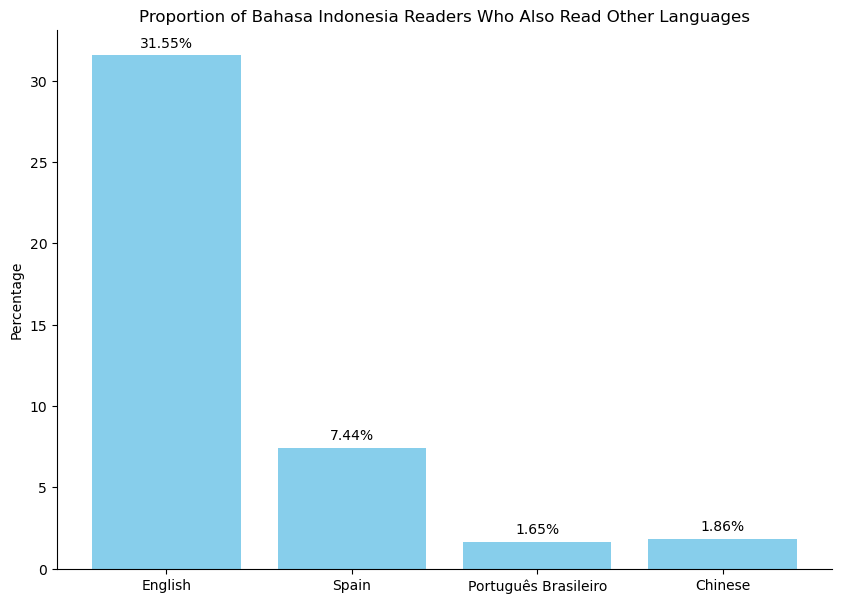

In [52]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt


lits = {}



for fn in sorted(glob.glob('/Users/josiechen/desktop/prepared data/*.csv')):

    if 'anglo-norman' in fn:
        continue
    

    df = pd.read_csv(fn)
    

    lang = os.path.basename(fn).replace('prepared data_', '').replace('.csv', '').lower()
    

    lits[lang] = df[['username', 'language', 'work_id']]


all_data = pd.concat(lits.values(), ignore_index=True)


bahasa_indonesia_readers = all_data[all_data['language'] == 'Bahasa Indonesia']['username'].unique()


bahasa_indonesia_reader_proportions = {}


other_languages = ['english', 'spain', 'Português brasileiro', 'chinese']


for lang in other_languages:
  
    other_lang_readers = all_data[(all_data['username'].isin(bahasa_indonesia_readers)) & (all_data['language'] == lang)]['username'].unique()
    other_lang_readers_count = len(other_lang_readers)
    total_bahasa_indonesia_readers_count = len(bahasa_indonesia_readers)
    

    if total_bahasa_indonesia_readers_count != 0:
        other_lang_readers_percentage = (other_lang_readers_count / total_bahasa_indonesia_readers_count) * 100
    else:
        other_lang_readers_percentage = 0
    
    bahasa_indonesia_reader_proportions[lang] = other_lang_readers_percentage

for lang, percentage in bahasa_indonesia_reader_proportions.items():
    print(f"Percentage of Bahasa Indonesia readers who also read {lang.replace('_', ' ').title()} articles: {percentage:.2f}%")


labels = [lang.replace('_', ' ').title() for lang in other_languages]
sizes = [bahasa_indonesia_reader_proportions[lang] for lang in other_languages]

fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(labels, sizes, color='skyblue')
ax.set_ylabel('Percentage')
ax.set_title('Proportion of Bahasa Indonesia Readers Who Also Read Other Languages')

for i in range(len(labels)):
    ax.text(i, sizes[i] + 0.5, f"{sizes[i]:.2f}%", ha='center')

plt.show()


# Use Copia's method to calculate the results of readers' language consumption habits

In [ ]:
dfs = []
for lang, df in lits.items():
    df['username'] = [t+'_'+lang for t in df['username']]
    dfs.append(df)
    
df_all = pd.concat(dfs, ignore_index=True)
df_all

In [12]:
abundance = u.to_abundance(df_all['username'])

In [13]:
try:
    os.mkdir('../outputs')
except FileExistsError:
    pass

In [10]:
print('original # works:', diversity(abundance, method='chao1'))
print('original # documents:', diversity(abundance, method='minsample'))

original # works: 81317.00893462854
original # documents: 1660321.4138434138


/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.70294950855896 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")


In [11]:
wsurvival_all = survival_ratio(abundance, method='chao1', n_iter=10000)

100%|███████████████████████████████████| 10000/10000 [00:07<00:00, 1314.69it/s]


In [12]:
%run /Users/josiechen/desktop/copia/plot.py

In [14]:
dsurvival_all = survival_ratio(abundance, method='minsample', n_iter=10000)

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.70294950855896 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  0%|                                                 | 0/10000 [00:00<?, ?it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.9636839918093756 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  0%|                                       | 1/10000 [00:01<3:05:50,  1.12s/it]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.213268109131604 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.559232347062789 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: User

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.139081605244428 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.454956872272305 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.560676676919684 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  0%|▏                                       | 46/10000 [00:01<03:02, 54.56it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.518918357905932 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.4679680968401954 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.3553354506148025 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.758017897489481 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.2512220564531162 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.593548427335918 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.24745451612398 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  1%|▎           

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.763713239110075 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.046321477391757 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.6156852830899879 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.586637221160345 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.823939766152762 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  1%|▌          

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.209339396678843 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.532324885833077 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.2784030783223 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.929004931123927 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.635427153669298 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.754540784750134 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.959425743902102 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.201940912986174 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.038814135710709 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.245472222566605 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

  3%|▉                                     | 260/10000 [00:03<01:33, 104.67it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.337796303443611 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.823720885324292 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.436576438136399 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.424301140708849 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.934943529544398 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.137568362872116 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.245327187585644 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  3%|█▏                                    | 304/10000 [00:03<01:36, 100.13it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.944804596947506 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.9072511601261795 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.31236116902437 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.316255790297873 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.3267011340940371 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.173087859875523 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.492011974216439 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  3%|█▎                                     | 348/10000 [00:04<01:37, 99.45it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.282564667868428 > 0.1
  warnings.warn

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.22714812948834 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.970714021939784 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.519314327742904 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.443808249081485 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.916804789099842 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.78845822729636 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.378004404483363 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.831440720008686 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.476441287202761 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.23586626769974828 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

  5%|█▊                                    | 469/10000 [00:05<01:32, 103.22it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.048527292208746 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.80423227720894 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.963022296898998 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.655007523135282 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.544296276639216 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.114898874773644 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.39700670109596 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.710357759497128 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  5%|█▉                                    | 513/10000 [00:06<01:31, 103.13it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.15923697361722589 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.420368903549388 > 0.1
  warnings.warn

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.07054368290119 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.472912267781794 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.4062172658741474 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.722498280461878 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.04884712677449 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  6%|██           

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.927254647482187 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.845206402125768 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.576783788041212 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.145812129136175 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.7770289212930948 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

  6%|██▍                                   | 634/10000 [00:07<01:33, 100.20it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.802172786090523 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.784407493541948 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.65383141534403 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.992381813121028 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.90615440509282 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.894497442641295 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  7%|██▌                                   | 678/10000 [00:07<01:31, 101.38it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.063019379740581 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.303513519233093 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.992188055999577 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.76362381724175 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.8703646219801158 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.764545589336194 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.028349579544738 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  7%|██▋                                   | 722/10000 [00:08<01:32, 100.33it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.3734616356669 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.076564643764868 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.618973389151506 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.863703615381382 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.503783044288866 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  8%|██▉                                   | 766/10000 [00:08<01:30, 101.89it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.052489580819383 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.009850002476014 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.057186139281839 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.4091317064594477 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.279996822122484 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.568813621532172 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.66500954166986 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  8%|███          

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.771351151750423 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3423192803747952 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.178362986189313 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.61369095928967 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.062978403177112 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/De

  9%|███▎                                  | 887/10000 [00:09<01:28, 102.68it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.430735941510648 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.91623673425056 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.402291887439787 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.730282550211996 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.541222090134397 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.137944982852787 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.164494364405982 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.47483083116822 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  9%|███▌                                  | 931/10000 [00:10<01:30, 100.21it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.074616401805542 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.91819865256548 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.15790273132734 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.268178667407483 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 10%|███▊                                   | 972/10000 [00:10<01:34, 95.65it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.794580964720808 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.910789042362012 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.4737863901536912 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.095411105197854 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 10%|███▊                                  | 1012/10000 [00:11<01:39, 90.73it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.847435833653435 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.1978160435101 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.686552585102618 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.912576036178507 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.697465223958716 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.257941059186123 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 11%|████                                  | 1055/10000 [00:11<01:32, 97.17it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.459130521863699 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.940251809661277 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.902881063055247 > 0.1
  warnings.warn

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.076917374972254 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.721133868792094 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.394029606250115 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 11%|████                                 | 1099/10000 [00:11<01:27, 101.85it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.4493235668633133 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.421402351697907 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.134125874144956 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.749656902626157 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.377028199378401 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.442792386747897 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.092206791858189 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.354783351067454 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.377066041342914 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.654417392681353 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.9511755836429074 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.98353827232495 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.535270388587378 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.358881968306378 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.467696266830899 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.711318132118322 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.93945723946672 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

 13%|████▋                                | 1264/10000 [00:13<01:27, 100.33it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.26197379664518 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.937360914889723 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.81091080675833 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.505299859913066 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.730180935119279 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.683539507561363 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 13%|████▉                                 | 1307/10000 [00:13<01:29, 97.64it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.336441546329297 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.059358628233895 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.38348490651697 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.711097625200637 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.73595534870401 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.210993451299146 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.707077171420678 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.921286757919006 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.609456927864812 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.379704560618848 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.423523281351663 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.536450695828535 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.843108786153607 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.943457941990346 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josieche

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.98324843356386 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.3649261395912617 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.294636323233135 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.491718523669988 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.237435836228542 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.447322003310546 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.902433352079242 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.64855870907195 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.12297907716129 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.333530392497778 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 15%|█████▊         

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.974637921899557 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.655545046087354 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.370713739655912 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.510711981682107 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 16%|█████▉                                | 1558/10000 [00:16<01:29, 94.43it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.1871301744831726 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.291315459646285 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.6205727512715384 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 16%|██████                                | 1598/10000 [00:17<01:26, 96.69it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.416472529410385 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.878218593657948 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.841206077719107 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.801434581750073 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.166439994238317 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 16%|██████▏                               | 1639/10000 [00:17<01:25, 97.57it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.5892821997404099 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.560490052215755 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.28980190877337 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.707044231821783 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.193470066064037 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 17%|██████▍                               | 1681/10000 [00:17<01:24, 98.28it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.98132554104086 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.607543879421428 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.883042692323215 > 0.1
  warnings.warn(f"To

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.408467837725766 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.370339221321046 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 17%|██████▌                               | 1722/10000 [00:18<01:25, 97.02it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.70443114975933 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.759989813668653 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.69833554001525 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.289649908430874 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 18%|██████▋                               | 1762/10000 [00:18<01:24, 97.30it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.71288365207147 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.575137683656067 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.3561472883448 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.0944827334024 > 0.1
  warnings.warn(f"Tol

 18%|██████▊                               | 1803/10000 [00:19<01:23, 97.88it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.614186714519747 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.213375596445985 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.832835572422482 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.981779691181146 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.659963862388395 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.932363757980056 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 18%|███████                               | 1845/10000 [00:19<01:22, 99.19it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.50721773353871 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.224080480635166 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.14316843415145 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.3315168698318303 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.028633566573262 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 19%|███████▏                              | 1887/10000 [00:19<01:21, 99.86it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.84640364581719 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.761391576146707 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.224947527167387 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.111851543886587 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.643550725653768 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 19%|███████▎                              | 1928/10000 [00:20<01:21, 99.42it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.669236277462915 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.2223947565071285 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.40374019171577 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.399078381829895 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.056200444931164 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.774687220226042 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.364612593082711 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 20%|███████▍                              | 1972/10000 [00:20<01:20, 99.91it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.771160722710192 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.617907800595276 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.96011260349769 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.749515501549467 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.2965529452776536 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.685588066466153 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.333663027035072 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.309851425467059 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.314741161302663 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.280209566350095 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.47011364204809 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.17173248215113 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.59763768571429 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 21%|███████▋                             | 2093/10000 [00:22<01:18, 100.69it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.28672206751071 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.30175280966796 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.420685098390095 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.487536530708894 > 0.1
  warnings.warn(f"Tol

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.479924704297446 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.827841770485975 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.009792902972549 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 21%|███████▉                             | 2137/10000 [00:22<01:16, 102.17it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.804703617235646 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.50218151882291 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.370969481766224 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.98065152205527 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.107585479854606 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.883360024774447 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.412780608981848 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.7284248220967129 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.918410082696937 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.039521432598121 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.944168254267424 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.749973391764797 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.42507407523226 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.6763571029296145 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.12655364233069 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.34513954340946 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.220285585266538 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/De

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.413058194331825 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.635600434383377 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.204128283890896 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.25394303142093 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.55547953234054 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.474359770887531 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.1775288693606853 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.254720589146018 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.69669003225863 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.80452315392904 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.812102748663165 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.401237031444907 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.6487064610701054 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.127427191124298 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.8438285465817899 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.386050480999984 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.39458355132956 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.469322014600039 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.621038773912005 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.606230236124247 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.448627392295748 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.792789063300006 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.920264901476912 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.2224280008813366 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.55428803700488 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.220409105415456 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.651204833295196 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.46249723387882113 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.0039063030853868 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.052210273919627 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiech

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.50054697180167 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.00506342679728 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.94826993253082 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.504149829270318 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.048003462143242 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 26%|█████████▊   

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.565181075478904 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.138800860382617 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.47044200450182 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 26%|█████████▉                            | 2610/10000 [00:27<01:17, 95.01it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.21352028218098 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.466130279004574 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.94896078761667 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.190203632693738 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.31422161823138595 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 27%|█████████▊                           | 2654/10000 [00:27<01:12, 101.65it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.305644583888352 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.9166617037262768 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.29019445553422 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.6022340672789142 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.805637256940827 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.269830565783195 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 27%|█████████▉                           | 2698/10000 [00:28<01:10, 103.50it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.82688344840426 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.42531783762388 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.151794347097166 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.367639375734143 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.90850999567192 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.069049222394824 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 27%|██████████▏ 

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.785973567632027 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.1391763534629717 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.723178884712979 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.32495279586874 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 28%|██████████▎                          | 2786/10000 [00:28<01:11, 101.35it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.262601364171132 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.26380465540569276 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.414484880282544 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.604594003758393 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.169184510130435 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.943827057722956 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 28%|█████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.621009629918262 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.608854870311916 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.537708651740104 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.373339509475045 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.367584287771024 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 29%|██████████▋

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.354714818880893 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.485842368216254 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.582559168804437 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.047024977277033 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.857773060211912 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.050495234900154 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.48831990081817 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.260310806450434 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.230760637437925 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.95782774745021 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.069181980448775 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 30%|███████████                          | 2995/10000 [00:31<01:08, 101.76it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.86385459837038 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.345000260393135 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.125501933624037 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.5773591204779223 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.58485281362664 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.815066704410128 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.996893614064902 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.644617780810222 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 30%|███████████▏                         | 3039/10000 [00:31<01:08, 101.59it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.05521602067165 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.56106534623541 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.934675515745766 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.93544993083924 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.066034910734743 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.079322256962769 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.854376077302732 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.62752705370076 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.600983742042445 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.399926193174906 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.517122609424405 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.14186066063121 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 32%|███████████▋                         | 3160/10000 [00:32<01:08, 100.45it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.587397809606045 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.328274313011207 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.57535763666965 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.06369734101463 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.662379940855317 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.424443023628555 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.58824232488405 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 32%|███████████▊                         | 3204/10000 [00:33<01:07, 101.15it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.515835107071325 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.136978132184595 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.3408254297683 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.580767767503858 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.684022619971074 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 32%|████████████                         | 3248/10000 [00:33<01:06, 101.52it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.61370398744475 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.510466300533153 > 0.1
  warnings.warn(f"T

 33%|████████████▏                        | 3292/10000 [00:33<01:06, 101.42it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.688237398397177 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.270135647733696 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.292084578424692 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.57925332977902 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.97871290834155 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.20232499705162 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.388720362214372 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.578198638511822 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.51211684779264 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.226721788640134 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.69118116493337 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 34%|████████████▌                        | 3380/10000 [00:34<01:04, 102.57it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.824762322125025 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.997116341255605 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.23287880793214 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.6408751572016627 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.10620116442442 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.17772165115457 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.074683751096018 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 34%|████████████▋                        | 3424/10000 [00:35<01:04, 102.04it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.520551095716655 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.20880348829087 > 0.1
  warnings.warn(f"To

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.125886899186298 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 35%|████████████▊                        | 3468/10000 [00:35<01:02, 103.94it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.617909847409464 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.8347536553628743 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.730506992083974 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.689656544360332 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.979231418692507 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.79627425398212 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 35%|████████████▉                        | 3512/10000 [00:36<01:02, 104.34it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.376293571433052 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.73235921736341 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.38927077932749 > 0.1
  warnings.warn(f"To

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.962226234027185 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.030181415728293 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.805002870736644 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 36%|█████████████▏                       | 3556/10000 [00:36<01:02, 102.63it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.154015044332482 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.1089616782264784 > 0.1
  warnings.warn

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.282905815751292 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.047914391499944 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.753609346109442 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 36%|█████████████▎                       | 3600/10000 [00:36<01:02, 103.00it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.58300891984254 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.8384672343963757 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.815912221907638 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.82651195197832 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.934806991252117 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.060863586724736 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.302364598726854 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 36%|█████████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.85550499963574 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.5011798130581155 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.333594263182022 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.40038655209355 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.948713942430913 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.440775647410192 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.285450903349556 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.424304571235552 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.9840925983153284 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.95564422267489 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.826724762795493 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.903264505323023 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.616432626149617 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.94398267113138 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3834811736596748 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.71811578096822 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.063112504431047 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.605818888987415 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.797506893868558 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.490228705573827 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.305620625731535 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.161006325739436 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.489802716881968 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.0978863482596353 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.74435204663314 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

 39%|██████████████▍                      | 3897/10000 [00:39<01:00, 101.08it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.912983720889315 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.064246272551827 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.1294603460701182 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.18975793675053865 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.72679847967811 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.861398055800237 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.348918678355403 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 39%|██████████████▌                      | 3941/10000 [00:40<01:00, 100.76it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.20106179756112397 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.364564351621084 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.652873891987838 > 0.1
  warnings.warn

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.213194697164 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.351395692676306 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 40%|███████████████▏                      | 3983/10000 [00:40<01:01, 98.42it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.482311531435698 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.363434154423885 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.4662801485974342 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.71119798196014 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.5435673216125 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.3195674624294043 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.613273735390976 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.607920872978866 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/De

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.2521298875799403 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.43698461202439 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.514194688061252 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.8377668294124305 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.8464281387859955 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 41%|███████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.59085221204441 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.10218324849847704 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.166094840038568 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.651605002116412 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.276479369378649 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 41%|██████████

 42%|███████████████▊                      | 4156/10000 [00:42<01:03, 92.66it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.8365741627058 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.16865607269574 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.270450259558856 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.86860289995093 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.52588529442437 > 0.1
  warnings.warn(f"To

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.35071112937294 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.079910031869076 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.541986144380644 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.25143748021219 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.18001263588667 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/De

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.558930324274115 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.715279743424617 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.01690851559397 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.891308914171532 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.20037994510494 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.513411371270195 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.9864603511523455 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.358663183520548 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.071397894993424 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.27861009456683 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.991807416430674 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.050914529361762 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.03234796912875 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.943876843666658 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.4504607701674104 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.935443546739407 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.80339107150212 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.973843943560496 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.728183416067623 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.01798674731981 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.340662221657112 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.333416572655551 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.446648510871455 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.172955039422959 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.43442070519086 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.66223915584851 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.995968399103731 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.24032183527015 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.823361695744097 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 45%|████████████████▌                    | 4461/10000 [00:45<00:54, 100.91it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.832996356650256 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.231642195256427 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.182480244431645 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.482692786841653 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.638246779097244 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.395716202212498 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.0020256279967725 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.067792417248711 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.869580991799012 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.194769053370692 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.602208192343824 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.250104950508103 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.338839076575823 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.54495277418755 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.47303967049811 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.4056420649867505 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.019356831675395 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.02290717861615 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.04854194924701 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.5018859843257815 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.047697873786092 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.054630659637041 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.766985999420285 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.004476897302084 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.2947655192110687 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.02552343555726 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.71670351200737 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.646001075045206 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.208087181206793 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.357460831990466 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.693396418704651 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

 48%|█████████████████▌                   | 4757/10000 [00:48<00:50, 103.62it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.649154919665307 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.629489554907195 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.928513738908805 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.845156180788763 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.702965121832676 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.155726657481864 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.479725561570376 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.822414493188262 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 48%|██████████████████▏                   | 4801/10000 [00:49<00:52, 99.59it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.81963436480146 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.344634839799255 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.96130724879913 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.597727445303462 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.148750586202368 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 48%|█████████████████▉                   | 4845/10000 [00:49<00:51, 100.32it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.222449648892507 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.156889037578367 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.43963659752626 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 49%|██████████████████▎                  | 4933/10000 [00:50<00:50, 100.89it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.892286868067458 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.059404265717603 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.912103669717908 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.477097301045433 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.830548841622658 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.263343829312362 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.486230368725955 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.051170171936974 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 50%|██████████████████▉                   | 4977/10000 [00:50<00:50, 99.88it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.65652689000126 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.010019765002653 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.132872828166 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.56916619767435 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.84455107676331 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.097207184531726 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Des

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.965991834411398 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.658688874449581 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.1316447526915 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 51%|██████████████████▋                  | 5063/10000 [00:51<00:49, 100.58it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.59624756698031 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.13920851959847 > 0.1
  warnings.warn(f"Tol

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.825519592035562 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.056312400032766 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.07312881818507 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.25593728350941 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.594785551424138 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 51%|█████████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.970476413960569 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.287793994531967 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.243014748441055 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5927012423053384 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.19462864578236 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.18059142853599 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.519127218518406 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.248635012889281 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.189983803080395 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.921042558853514 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 52%|█████████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.80313469131943 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.1117879555094987 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.413961969665252 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.659971580374986 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.9183347763028 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/De

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.857277763774619 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.59977683913894 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.191839287173934 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.5762311629951 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.896413915441372 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Des

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.6954659436596557 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.51399257814046 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.884428255958483 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.2850104628596455 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 53%|███████████████████▋                 | 5327/10000 [00:54<00:44, 104.62it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.582822331925854 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.198196789366193 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.39631446171552 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 54%|███████████████████▊                 | 5371/10000 [00:54<00:44, 105.02it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.894775908323936 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.988778314436786 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.18693972658366 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.272163473884575 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.451118067023344 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 54%|████████████████████                 | 5415/10000 [00:55<00:44, 104.04it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.84511867875699 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.60287750675343 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.888750299578533 > 0.1
  warnings.warn(f

 55%|████████████████████▏                | 5459/10000 [00:55<00:44, 102.04it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.200084505137056 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.922048882232048 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.412209053640254 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.161629282636568 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.038440288626589 > 0.1
  warnings.warn(f"

 55%|████████████████████▎                | 5503/10000 [00:55<00:44, 100.39it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.980951097561046 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.42584760393947363 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.77643737755716 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.432662860839628 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.85804627125617 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.065759476157837 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 55%|████████████████████▌                | 5547/10000 [00:56<00:43, 101.63it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.761288518551737 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.215655855252407 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.13870549330022186 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.01518541330006 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.4834511156659573 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.236497849808075 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.79825132410042 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 56%|████████████████████▋                | 5591/10000 [00:56<00:43, 101.61it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.948309005703777 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.251776003628038 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.805137836490758 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.615551754715852 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.025944624445401 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.03109957173001 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.6858003285015 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desk

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.45359803934116 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.26363746577408 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.115722291637212 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 57%|█████████████████████                | 5678/10000 [00:57<00:43, 100.39it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.087577702477574 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.154798603383824 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.7233066278276965 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.224642046843655 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.830646051676013 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 57%|█████████████████████▏               | 5722/10000 [00:58<00:42, 100.88it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.7964655264513567 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.6795194909209386 > 0.1
  warnings.warn

 58%|█████████████████████▉                | 5763/10000 [00:58<00:45, 93.98it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.168612441862933 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.9398119482211769 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.320184019510634 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.48710552288685 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.8675049454905093 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.68613916321192 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.611861719400622 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.20627023652196 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.570471932645887 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.0535520592238754 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 58%|████████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.414667410892434 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.268437470193021 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.527969199232757 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.3448701561428607 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.254474807647057 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 59%|██████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.279792935587466 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.848082411801443 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.388998415670358 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.771272145211697 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.412089052377269 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josieche

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.6285038277274 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.365095428423956 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.571942289476283 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.587406915728934 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.619182163733058 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.524131198879331 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.488267065025866 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.470273792743683 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.983345574466512 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.458860153448768 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.81938050617464 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.1701576304622 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.878065738477744 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.828558333101682 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.847646536072716 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/De

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.718547984142788 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5661313871387392 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.8420115826884285 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.3323657931759953 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.749464044929482 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josieche

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.586611914797686 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.53113226091955 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.142471585189924 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.645586868049577 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.996466612326913 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

 62%|███████████████████████▍              | 6153/10000 [01:02<00:38, 99.41it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.155651450389996 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.142495557898656 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.659471504506655 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.466087048058398 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.974417587043718 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.912659682100639 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.879710713750683 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 62%|███████████████████████              | 6241/10000 [01:03<00:36, 103.48it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.801478229113854 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.984111438388936 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.3495522872544825 > 0.1
  warnings.warn

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.18442915508058 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.962528992677107 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.066768899327144 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.772082112031057 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 63%|███████████████████████▎             | 6285/10000 [01:03<00:37, 100.06it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.325492107309401 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.44247156381607 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.72011886886321 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 63%|███████████████████████▍             | 6329/10000 [01:04<00:35, 103.22it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.9555690868292 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.942442905157804 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.971084045013413 > 0.1
  warnings.warn(f"To

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.339541584369726 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.45406995806843 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.764002385200001 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.03324423590675 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.89563228818588 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 64%|███████████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.980254141264595 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.308400644687936 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.1778649896150455 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.511861008242704 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.24206081230659 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 64%|█████████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.544452911708504 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.57424094050657 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.897273832932115 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.458079136442393 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.260090319439769 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 65%|███████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.681061519077048 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.056825978448614 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.325570308370516 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.489510573795997 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.295475520659238 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 65%|███████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.93146170815453 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.143803636194207 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.732208140078 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.0697522724512964 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.199076121323742 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Des

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.171685921261087 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.246705154306255 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.96361733356025 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.222689149784856 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.118770712288097 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

 66%|█████████████████████████▏            | 6626/10000 [01:07<00:33, 99.85it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.374914581654593 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.5644114532042295 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.9449112436268479 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.990034323651344 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.034638835815713 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.340034623164684 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 67%|████████████████████████▋            | 6670/10000 [01:07<00:33, 100.67it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.594522613915615 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.213583440170623 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.1527802668279037 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.31062990031205 > 0.1
  warnings.warn(f

 67%|████████████████████████▊            | 6714/10000 [01:07<00:32, 101.45it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.596974460757338 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.255342934746295 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.552181764040142 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.689756901352666 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.614585542236455 > 0.1
  warnings.warn(

 68%|█████████████████████████▏           | 6800/10000 [01:08<00:31, 100.95it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.380695003084838 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.21695691975765 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.293163125636056 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.151374008390121 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.203419322497211 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.94385684817098 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.432692504138686 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 68%|█████████████████████████▎           | 6844/10000 [01:09<00:31, 100.55it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.884282434475608 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.233141292352229 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.10036894667428 > 0.1
  warnings.warn(f"T

 69%|██████████████████████████▏           | 6888/10000 [01:09<00:31, 99.50it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.821611296501942 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.218666178174317 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.038560514803976 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.7222964123357087 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.215796272386797 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.632518688566051 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 70%|██████████████████████████▍           | 6951/10000 [01:10<00:32, 93.47it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.2544083308894187 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.543284049839713 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.1712434268556535 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.974936567479745 > 0.1
  warnings.warn

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.68291910958942 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.343216896639206 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 70%|██████████████████████████▌           | 6993/10000 [01:10<00:30, 99.13it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.440272441948764 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.148322173627093 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.758058773470111 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.83685659384355 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.14287014433648437 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 70%|██████████████████████████▋           | 7036/10000 [01:11<00:30, 97.41it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.2170753405662253 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.24451511434745 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.906658954336308 > 0.1
  warnings.warn(f

 71%|██████████████████████████▏          | 7078/10000 [01:11<00:29, 100.52it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.549392886343412 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.4752319639082998 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.190833637258038 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.005800028098747 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.501886221347377 > 0.1
  warnings.warn

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.328198019997217 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 71%|███████████████████████████           | 7122/10000 [01:12<00:28, 99.35it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.787923258147202 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.35489939514082 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.813876202795655 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.428706981590949 > 0.1
  warnings.warn(f"

 72%|███████████████████████████▏          | 7164/10000 [01:12<00:28, 98.74it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.111477717757225 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.275968216476031 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.3616423859493807 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.251938478671946 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.36141647223849 > 0.1
  warnings.warn(f

 72%|██████████████████████████▋          | 7208/10000 [01:12<00:27, 101.38it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.086027359240688 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.46590307855513 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.137515280162916 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.762145248125307 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.66051919083111 > 0.1
  warnings.warn(f"To

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.451969456975348 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.656285025761463 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.172046742402017 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.62183687428478 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.565776636009105 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.756305603776127 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.127037890139036 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.012200542143546 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.938272071187384 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.105022032163106 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 73%|████████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3547060276614502 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.06076567491982 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 74%|████████████████████████████          | 7389/10000 [01:14<00:28, 92.08it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.15768932539504 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.352779831388034 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.62029368558433 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.786783087416552 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.77177573228255 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.766868397709914 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.76291388401296 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.983562505454756 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.408146440051496 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.929169533890672 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 75%|███████████████████████████▋         | 7486/10000 [01:15<00:24, 101.40it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.368281735223718 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.956179072498344 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.1715301253134385 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.007745402865112 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.36384710879065 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.416761807049625 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.752031053416431 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 75%|███████████████████████████▊         | 7530/10000 [01:16<00:24, 101.05it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.86301537277177 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5120105856331065 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.611980403540656 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.5038417112082243 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 76%|████████████████████████████         | 7573/10000 [01:16<00:24, 100.98it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.489337877137586 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.179621372604743 > 0.1
  warnings.warn(

 76%|████████████████████████████▏        | 7617/10000 [01:17<00:23, 100.94it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.1515582583379 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.349715489894152 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.6523367202607915 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.5393964007962495 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.5611639958806336 > 0.1
  warnings.warn(f"

 77%|████████████████████████████▌        | 7705/10000 [01:17<00:22, 101.13it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.337236274732277 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.49159163713921 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.704160368302837 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.33375299256295 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.883678857702762 > 0.1
  warnings.warn(f"T

 78%|████████████████████████████▊        | 7793/10000 [01:18<00:22, 100.02it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.226204376202077 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.501541491830721 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.008915203856304 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.154191953595728 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.795698756352067 > 0.1
  warnings.warn(

 79%|█████████████████████████████▏       | 7881/10000 [01:19<00:20, 102.61it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.335627893102355 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.27809569099918 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.496877784258686 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.446143621928059 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.04016336950008 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.706840021302924 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.0186276256572455 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 79%|█████████████████████████████▎       | 7925/10000 [01:20<00:20, 101.51it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.689184412593022 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.610955098993145 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.882090568658896 > 0.1
  warnings.warn

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.60419698129408 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.459603007882833 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.11607056413777 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.863017806666903 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 80%|█████████████████████████████▍       | 7969/10000 [01:20<00:19, 103.03it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.10851929069031 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.887859823647887 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.950993669917807 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.1881317240186036 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 80%|█████████████████████████████▋       | 8013/10000 [01:20<00:19, 103.01it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.62540952966083 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.501924947486259 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.033539633615874 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.387261318275705 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.814870007685386 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 81%|█████████████████████████████▊       | 8057/10000 [01:21<00:19, 101.60it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.7700648077297956 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.914857562747784 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.688043239992112 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.2093035571742803 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.479847695911303 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.339488521916792 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 81%|█████████████████████████████▉       | 8101/10000 [01:21<00:18, 100.45it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.061735174036585 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.17364606622141 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 81%|██████████████████████████████▏      | 8145/10000 [01:22<00:18, 101.52it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.531989354058169 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.139992494718172 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.777845614240505 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.645832504262216 > 0.1
  warnings.warn(f

 82%|██████████████████████████████▎      | 8189/10000 [01:22<00:17, 102.43it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.221687349840067 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.939676381414756 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.631486505968496 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.1174192430917174 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.99404406035319 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.574549565906636 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.862424313789234 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 82%|██████████████████████████████▍      | 8233/10000 [01:23<00:17, 100.91it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.93050523858983 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.550325367716141 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.377577324863523 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.9082484925165772 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.025299746426754 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 83%|██████████████████████████████▌      | 8277/10000 [01:23<00:17, 101.19it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.9342399833258241 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.265234213788062 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.625482410541736 > 0.1
  warnings.warn

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.454601840581745 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 83%|██████████████████████████████▊      | 8321/10000 [01:24<00:16, 100.86it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.221842019353062 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.103210258530453 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.9788663416402414 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.625674341456033 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.889065935160033 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.250438431277871 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.771535609615967 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.746171293780208 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.752985201543197 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.4040630785748363 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.469220763770863 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.454896570183337 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.597822318901308 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.5513362070778385 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 84%|███████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.967766365152784 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.71371986484155 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 85%|███████████████████████████████▎     | 8464/10000 [01:25<00:15, 102.26it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.132337783579715 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.323840865981765 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.035966309020296 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.558607333572581 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.652016548090614 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.1945427189348266 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 85%|███████████████████████████████▍     | 8508/10000 [01:25<00:14, 103.51it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.582895906292833 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.803445410099812 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.049393092514947 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.00341912789736 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.857481613755226 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.337674033944495 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 86%|███████████████████████████████▋     | 8552/10000 [01:26<00:14, 102.68it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.011594872223213 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.254105445928872 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 86%|███████████████████████████████▊     | 8596/10000 [01:26<00:13, 104.22it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.332394465222023 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.718011776800267 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.23351506504696 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.485309875104576 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.745142230880447 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.074674659757875 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.03070249198936 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.710833998513408 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.910368958720937 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.201047285227105 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.864271930069663 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.817403762368485 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.12960610166192 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.700985446106642 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 87%|████████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.688320260029286 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.249307452118956 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.346498282859102 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 88%|████████████████████████████████▍    | 8783/10000 [01:28<00:11, 102.24it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.71780742809642 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.696710246964358 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.0394701121840626 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.8633158961310983 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.782928345142864 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.569702196167782 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 88%|████████████████████████████████▋    | 8827/10000 [01:28<00:11, 100.31it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.308345633093268 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.6750946044921875 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.63817024230957 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.08754310279619 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 89%|████████████████████████████████▉    | 8915/10000 [01:29<00:10, 103.06it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.599391717812978 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.1543123772135 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.228228416410275 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.71525316510815 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.151633452274837 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 90%|██████████████████████████████████    | 8959/10000 [01:30<00:10, 97.78it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.351932740653865 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.465176856261678 > 0.1
  warnings.warn(f

 90%|██████████████████████████████████▏   | 9000/10000 [01:30<00:10, 94.92it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.644058443023823 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.0906014156062156 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.563520121620968 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.694070660392754 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.68083648069296 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.616226743441075 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.407983608776703 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.341787510900758 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.097814205568284 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.535596466274 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 91%|█████████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.633821652038023 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.842449653078802 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 91%|█████████████████████████████████▋   | 9096/10000 [01:31<00:08, 104.46it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.36666421429254 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.078830109210685 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.243765791412443 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.655393283232115 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.31102312996517867 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.272531743976288 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.208594684139825 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.05327766260598 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 92%|██████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.8276117203058675 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.54900511924643 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 92%|██████████████████████████████████   | 9195/10000 [01:32<00:07, 102.56it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.8713719580555335 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.72688203654252 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.126762988395058 > 0.1
  warnings.warn(f"

 92%|██████████████████████████████████▏  | 9239/10000 [01:33<00:07, 103.73it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.580066011170857 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.69836832326837 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.476555852103047 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.05397166335024 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.573001462733373 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.34753079607617 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.298350277123973 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.303344125393778 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.72664689924568 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.131179921794683 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 93%|████████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.64768287015613 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.49733091017697 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.454037075745873 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.68218908936251 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.6565859315451235 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.514075813465752 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.183142037480138 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 94%|██████████████████████████████████▋  | 9382/10000 [01:34<00:06, 102.69it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.675857615540735 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.9756910299183801 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.070620405487716 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.8539338062983 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.05484698130749 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 94%|██████████████████████████████████▉  | 9426/10000 [01:34<00:05, 102.99it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.8427679205779 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.765941468649544 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.045896550174803 > 0.1
  warnings.warn(f"Tol

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.201415586634539 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.187117404770106 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.65976073325146 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 95%|███████████████████████████████████  | 9470/10000 [01:35<00:05, 104.37it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.893893010681495 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.593317122897133 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.840127570321783 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.167767220758833 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.574862866313197 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.0163547078846022 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 95%|███████████████████████████████████▏ | 9514/10000 [01:35<00:04, 103.39it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.708982019685209 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.780538307735696 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.184583520516753 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.465415584272705 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.641046362812631 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.947166238562204 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/De

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.038168122177012 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.67131988494657 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.68286444421392 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.983772021369077 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.826634705998003 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 96%|████████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.151779149658978 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 96%|███████████████████████████████████▋ | 9646/10000 [01:37<00:03, 100.71it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.6560289759654552 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.584643371519633 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.394875313271768 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.72575835324824 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.675901438225992 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.727329753222875 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 97%|████████████████████████████████████▊ | 9690/10000 [01:37<00:03, 99.43it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.3744777913671 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5660941841779277 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.664012203575112 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.13657238148153 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 97%|████████████████████████████████████ | 9732/10000 [01:37<00:02, 100.36it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.436706359614618 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.507814429118298 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.937290313770063 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.949639970203862 > 0.1
  warnings.warn(f

 98%|████████████████████████████████████▏| 9776/10000 [01:38<00:02, 100.39it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.167092651012354 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.0886298895347863 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.309861069894396 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.24478429032024 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.182700855657458 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.267641760990955 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.644390357541852 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.017614633776248 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.446037598419935 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.067005779361352 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.47348712279927 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.640467630932108 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.220150531968102 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.29570903663989 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 99%|████████████████████████████████████▋| 9919/10000 [01:39<00:00, 101.10it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.5880391786340624 > 0.1
  warnings.warn(f"

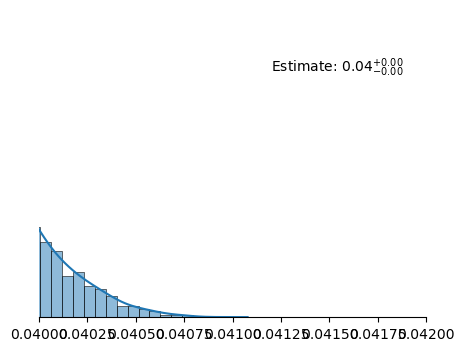

In [15]:
ax = density_plot(dsurvival_all, figsize=(5, 4), xlim=(0.04, 0.042))
ax.set_yticklabels([])
ax.tick_params(axis='y', which='both', left=False)
ax.set_ylabel(None)
ax.spines['left'].set_visible(False)


In [16]:
minsample_est = diversity(abundance, method='minsample', 
                          solver='fsolve', CI=True, n_iter=10000)

/Users/josiechen/Desktop/copia/estimators.py:535: RuntimeWarning: overflow encountered in exp
  v = lambda x: np.exp(x * (2 * f2 / f1))
/Users/josiechen/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/josiechen/Desktop/copia/estimators.py:548: UserWarning: Tolerance criterion not met via fsolve: inf > 0.1-> backing off to grid-solver.
  warnings.warn(msg)
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.70294950855896 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")


Diff_intersect: inf


  0%|                                                 | 0/10000 [00:00<?, ?it/s]/Users/josiechen/Desktop/copia/estimators.py:535: RuntimeWarning: overflow encountered in exp
  v = lambda x: np.exp(x * (2 * f2 / f1))
/Users/josiechen/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/josiechen/Desktop/copia/estimators.py:548: UserWarning: Tolerance criterion not met via fsolve: inf > 0.1-> backing off to grid-solver.
  warnings.warn(msg)
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.084932349738665 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  0%|                                       | 1/10000 [00:01<3:36:40,  1.30s/it]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.31371326185763 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.973030591150746 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.400252425461076 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.935001263045706 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.372908439137973 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  0%|▏           

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.310949287377298 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.2304888346698135 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.031815618276596 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.635248446837068 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.98406896716915 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

  1%|▍                                      | 126/10000 [00:02<01:39, 99.68it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.078190561267547 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.308708012918942 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.66621948836837 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.557395470677875 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.722156061325222 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.500150335021317 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.259698576061055 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.77754935005214 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  2%|▋                                     | 171/10000 [00:02<01:34, 104.48it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.95363530376926 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.902555671520531 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.5590404132381082 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.478107186965644 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.00807036308106 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.2575406165560707 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.717624848592095 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  2%|▊            

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.34383258712478 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.386050480999984 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.287463944521733 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.189081788994372 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.119053383241408 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  3%|▉            

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.896118361852132 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.7595385394524783 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.968946653301828 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.195557200466283 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.68080001277849 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  3%|█▏         

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.760483180405572 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.15062000742182 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.74304708535783 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.63541232724674 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.404966838657856 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/De

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.5793343777768314 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.067676281556487 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.122156750410795 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.519718683790416 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.2399774416117 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.4592479103012 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.50542649673298 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.15639621031005 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.72762570262421 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.953833639388904 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Des

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.301569393835962 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.61385064991191 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.563483108882792 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.751562816090882 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.430445209611207 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/De

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.326469264458865 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.369112935150042 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.828635574667715 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.12402087787632 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.435612575616688 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

  6%|██                                    | 556/10000 [00:06<01:31, 103.20it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.9700042522745207 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.7150791640160605 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.795931002707221 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.2251590224914253 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.1354766838485375 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.9100994146429 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.96871379762888 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  6%|██▎                                   | 600/10000 [00:07<01:33, 100.37it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.308125858078711 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.098807296832092 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.178527292329818 > 0.1
  warnings.warn(f"To

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.57810938102193 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.979288955917582 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.779737132717855 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.980254141264595 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.018264191458002 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  6%|██▍           

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.842626514146104 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.588306922232732 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.47044200450182 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  7%|██▋                                    | 685/10000 [00:07<01:39, 93.96it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.455171264708042 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.6219366654986516 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.56839167547878 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.415369888651185 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  7%|██▊                                    | 725/10000 [00:08<01:40, 92.13it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.705349480733275 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.84403780370485 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.330537240719423 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.577115984982811 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.150840300368145 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.821668271906674 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.45644612715114 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  8%|██▉                                    | 769/10000 [00:08<01:32, 99.50it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.845489564700983 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.140423388336785 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.904966641799547 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.079309465596452 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.496143746306188 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.019518876564689 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/De

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.91388548060786 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.116449126740918 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.60600524675101 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.426642662612721 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.57281566655729 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/De

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.0445414127316326 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  9%|███▍                                  | 890/10000 [00:09<01:28, 103.16it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.962286678375676 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.632840515929274 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.9301743371179327 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.213943881215528 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.97218570637051 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.350400497438386 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.7265355354174972 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  9%|███▌                                  | 934/10000 [00:10<01:30, 100.26it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.49081439350266 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.05216196971014 > 0.1
  warnings.warn(f"To

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.701644313172437 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.466882581124082 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.320293091237545 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.135853798827156 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 10%|███▊                                   | 978/10000 [00:10<01:31, 98.74it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.5738013262161985 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.120942157926038 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5755728029180318 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.8709205086343 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.902338556712493 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.190403338288888 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 10%|███▉         

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.114960544509813 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.6802717165555805 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.46055199741386 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.75365882681217 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.02061626908835 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 11%|████          

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.65896049363073 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.63066126476042 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.245199605589733 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.41486750857439 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.394857255276293 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

 11%|████▏                                | 1140/10000 [00:12<01:27, 101.22it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.9176434465916827 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.60607925709337 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.088218934834003 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.938256211346015 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.366308204247616 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.768558605224825 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.09474056388717 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 12%|████▍                                | 1184/10000 [00:12<01:27, 100.58it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.301979142590426 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.52089196012821 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.100589720532298 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.9040474814828485 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.93659107608255 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.244795935577713 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.064853122690693 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 12%|████▌                                | 1228/10000 [00:13<01:26, 101.29it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.615551754715852 > 0.1
  warnings.warn(f"

Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf


/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.253669678466395 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.10336345259566 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.1496882255887613 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 12%|████▋                                | 1250/10000 [00:13<01:26, 101.44it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.508916991529986 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.371188234072179 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.93110657064244 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.450246024876833 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.541538160294294 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.728890991886146 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.30268010974396 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 13%|████▊        

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.008325598319061 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.74991768586915 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.505278920056298 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.132826735265553 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.10704379959497601 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.579806583933532 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.031690573086962 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.188619194901548 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.956568130874075 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.311167016508989 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.770463310182095 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.4013413096545264 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.454346645157784 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.620658895466477 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.168509311159141 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.937587565742433 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 15%|█████▍                               | 1456/10000 [00:15<01:24, 101.51it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.46585820056498 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.047163991606794 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.47477574821096 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.79968541301787 > 0.1
  warnings.warn(f"To

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.91558889625594 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.351511059096083 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.624789186986163 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.404206233564764 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 15%|█████▌                               | 1500/10000 [00:16<01:23, 101.45it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.77776538557373 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.080770091968589 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.599747311207466 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.243849078309722 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.685279260505922 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.323376809130423 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.27587103075348 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.65032251831144 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.538762309704907 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.739744335995056 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.26324208988808 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.3908663399051875 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 16%|█████▉                               | 1621/10000 [00:17<01:22, 101.15it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.377470020204782 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.8964097861899063 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.230725344852544 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.285674938582815 > 0.1
  warnings.warn

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.95932921534404 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.4096453017555177 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.350467221112922 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 17%|██████▏                              | 1665/10000 [00:17<01:21, 101.98it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.190289730206132 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.239530891296454 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.401917389826849 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 17%|██████▎                              | 1709/10000 [00:18<01:20, 103.39it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.965378780500032 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.836396243539639 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.065601441892795 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.550418909173459 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.672314318595454 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.722933033946902 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.740100087132305 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 18%|██████▍                              | 1753/10000 [00:18<01:21, 101.06it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.1631978913210332 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.972393384785391 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.7950380310649052 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.7371903801104054 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.14020742860157 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.18346970807761 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.639191246940754 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 18%|██████▋      

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.560108694247901 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.525377223268151 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.802647948730737 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.612173549598083 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.311577960033901 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/De

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.6871962096774951 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.13011315127369 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.215892105246894 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.716073411284015 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.15708875551354 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.55341014894657 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.39808860665653 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.028414163505659 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.776680345414206 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.833611572510563 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/De

 20%|███████▎                             | 1962/10000 [00:20<01:16, 104.84it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.920330228982493 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.480065565323457 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.413952593575232 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.8866401840932667 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.272624092758633 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.413647973444313 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.898607454961166 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.6366869311314076 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 20%|███████▍                             | 2006/10000 [00:20<01:17, 102.75it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.893547771382146 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.322429938125424 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.9259766737231985 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.23648402839899 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.813564146519639 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.3922656578943133 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.0213752820855 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf


/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.90378630324267 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.292941756546497 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.41539922740776 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.705362571636215 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.500990234548226 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.524098127731122 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.918492693570442 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.38290640816558 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.198998855543323 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.01582228927873 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Des

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.6069700925145298 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.15819554880727 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.297654344583862 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.716953759198077 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.42869429930579 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/De

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.616432626149617 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.149552724440582 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.603153713745996 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.900670820614323 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.845031863078475 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

 22%|████████▎                            | 2237/10000 [00:23<01:15, 102.79it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.282618632540107 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.024691313505173 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.845840242924169 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.4543599083554 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.163335048127919 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.941582461935468 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.478224805090576 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 23%|████████▋                             | 2281/10000 [00:23<01:18, 98.40it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.80549744272139 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.20246702968143 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.573844579281285 > 0.1
  warnings.warn(f

 24%|████████▉                             | 2363/10000 [00:24<01:18, 97.66it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.251872884109616 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.50787067040801 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.224815844674595 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.48522284172941 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.431653882260434 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.06129163899459 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.6855295185232535 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 24%|████████▉                            | 2407/10000 [00:24<01:13, 103.48it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.259570769383572 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.317562122480012 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.178274381905794 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.58958881883882 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.9713575019268319 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.919645063811913 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.62135713454336 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.420294545358047 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 25%|█████████    

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.8041730637196451 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.781528611201793 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.209335499675944 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.046362154884264 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 25%|█████████▏                           | 2495/10000 [00:25<01:12, 104.04it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.98922336148098 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.669886743067764 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.591978920274414 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.238185837632045 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.757759806001559 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.005604703095742 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 25%|█████████▍

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.24587268079631 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.881717365933582 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.644213408813812 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.3670562838669866 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.822283183340915 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.75355593394488 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.687262346735224 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.812398354988545 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.313912430894561 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.449957631644793 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 26%|█████████▋     

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.6251085345866159 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.23710121982731 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.198777854326181 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.619078207295388 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.394688519998454 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 27%|█████████▉    

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.067409319570288 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.638268455863 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.955248424783349 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.32572632515803 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.698791422997601 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Deskt

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.102238908875734 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.882087116013281 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.95865309063811 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.2058351259911433 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.8976629141252488 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.544954763143323 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.85253070294857 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.955700788763352 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.67082416114863 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.6418590758694336 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/De

 28%|██████████▍                          | 2836/10000 [00:29<01:10, 101.35it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.28513059904799 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.730650094687007 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.27619939832948 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.797746043186635 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.292380962520838 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.455602543777786 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.40895355155226 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 29%|██████████▋                          | 2880/10000 [00:29<01:10, 101.22it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.83204105834011 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.519778705085628 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.333289145724848 > 0.1
  warnings.warn(f"

Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf


/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.826819866662845 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.12209837755654 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.066406846628524 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.567034668289125 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.978805623250082 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.931701570400037 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.477729065110907 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.800933921942487 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.856869701645337 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.508911714074202 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

 30%|██████████▉                          | 2968/10000 [00:30<01:08, 102.85it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.45433308079373 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.826647164532915 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.16149849037174 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.954790825024247 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.9630917384056374 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.888368862797506 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.56268966407515 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 30%|███████████▏                         | 3012/10000 [00:30<01:08, 102.17it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.156322003691457 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.695187211502343 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.855826333165169 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.50515512668062 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.626733393291943 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.8427450741874054 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.957821550429799 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 31%|███████████▎                         | 3056/10000 [00:31<01:08, 101.62it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.820929863490164 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.56692388386 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.963588206097484 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5484368193428963 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.546240721596405 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.351759799290448 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Deskt

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.558097443310544 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.544823878444731 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.074340265709907 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.19676279462874 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.047953227884136 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.218617867561989 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.20432392542716 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.590506583917886 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.910003364784643 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.034053029958159 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.817186997272074 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.442826078855433 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.419964613276534 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.867685199016705 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.003391470527276 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.390094390604645 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 33%|████████████                         | 3265/10000 [00:33<01:06, 101.38it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.44359000888653 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.817551040439866 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.834722840576433 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.373899488942698 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.672967714024708 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.483182191383094 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.20377185707912 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 33%|████████████▏                        | 3309/10000 [00:33<01:05, 101.94it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.226194091141224 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.875405333237723 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.541929366299883 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.906428209738806 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.312691219849512 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 34%|████████████▍                        | 3353/10000 [00:34<01:05, 100.92it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.948787069763057 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.2351083760149777 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5423498466843739 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.849379444145598 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.267234552418813 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.861467301961966 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.910918300389312 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.706241011503153 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.7343672150746 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.360051233205013 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 34%|████████████▋                        | 3441/10000 [00:35<01:04, 102.17it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.373514514765702 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.284595954348333 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.466130279004574 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.54251342487987 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.660080735222436 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.913728590356186 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 35%|████████████▉                        | 3485/10000 [00:35<01:02, 103.47it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.23534674302209 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.059950198978186 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.453983145649545 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.454041290096939 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 35%|█████████████                        | 3529/10000 [00:35<01:03, 101.83it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.011038838187233 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.162862255354412 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.269239790039137 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.2977469679899514 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.373339509475045 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.45044874632731 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 36%|█████████████▏                       | 3573/10000 [00:36<01:03, 101.57it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.327051146537997 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.729876182973385 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.28917901357636 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.269751572981477 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.870173952193 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.55079245660454 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desk

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.439088157261722 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.934711178764701 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.286928167566657 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.39549227745738 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.476493016583845 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.801421378273517 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.001779879559763 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.910061355680227 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.213645795243792 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.27503907494247 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")


Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf


/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.789399092784151 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.904099237639457 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.29083429230377 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.0854078432312235 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 37%|█████████████▋                       | 3705/10000 [00:37<01:02, 101.04it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.294183109421283 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.68134724884294 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.049878215417266 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.876732869888656 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 37%|██████████████▏                       | 3746/10000 [00:38<01:05, 95.12it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.4930908444803208 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.718786962796003 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.842519629048184 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.429233484785073 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.454566229134798 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.155498607899062 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 38%|██████████████▍                       | 3789/10000 [00:38<01:02, 98.69it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.752224148251116 > 0.1
  warnings.warn

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.421518180752173 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.469591822009534 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.077042351826094 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.657375606475398 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.40589617495425 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.575073522981256 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.069595296517946 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.45116794994101 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.197244278155267 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.232548407511786 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 39%|████████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.062451085774228 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.2952091852203 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.6786997391609475 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.850802842061967 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.86404181236867 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 39%|█████████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.074313146993518 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.640031154616736 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.393832000088878 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.042211076477543 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 40%|███████████████                       | 3959/10000 [00:40<01:07, 89.46it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.933163390145637 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.663476439774968 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.030017770826817 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.37184370099567 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.506248601246625 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.077845497406088 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 40%|█████████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.61479004402645 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.520629062899388 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.809554400504567 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.085605870233849 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 40%|██████████████▉                      | 4046/10000 [00:41<00:58, 101.69it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.506040927255526 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.68343074969016 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.914813476614654 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.20502454577945 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.164903719793074 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.33238735399209 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 41%|█████████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.678400327218696 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.16920298966579 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 41%|███████████████▎                     | 4134/10000 [00:41<00:57, 101.68it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.5761186927556992 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.5826249668607488 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.555254534468986 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.717210019822232 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.75612313207239 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.788038423517719 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.3166335184359923 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 42%|███████████████▍                     | 4178/10000 [00:42<00:56, 103.52it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.64171467302367 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.673451027483679 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.6006593430647627 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.808723008609377 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 42%|███████████████▌                     | 4222/10000 [00:42<00:56, 103.03it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.297306119697168 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.124388094758615 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.5723670583684 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.84987956075929 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 43%|███████████████▊                     | 4266/10000 [00:43<00:56, 101.57it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.805304668028839 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.241154256393202 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.63641173602082 > 0.1
  warnings.warn(f"To

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.073176721809432 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 43%|███████████████▉                     | 4310/10000 [00:43<00:55, 103.10it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.411276685190387 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.150836905813776 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.689405899029225 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.546701536048204 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.346016749506816 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.932744970195927 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 44%|████████████████                     | 4354/10000 [00:44<00:54, 103.49it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.851166807464324 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.680889272945933 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.8587734351167455 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.361298060975969 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.786429701722227 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 44%|████████████████▎                    | 4398/10000 [00:44<00:53, 103.87it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.441684622783214 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.507800334366038 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.925813146983273 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.864929119939916 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 44%|████████████████▍                    | 4442/10000 [00:44<00:52, 105.37it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.713932213606313 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.5918392619350925 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.861615097732283 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.0068882077466697 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.001019080285914 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.820090487715788 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 45%|████████████████▌                    | 4486/10000 [00:45<00:52, 104.36it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.80366981343832 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.802554831723683 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.8123645927989855 > 0.1
  warnings.warn(f

Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf


/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.700133360223845 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.99494098208379 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.78522710793186 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.660851078573614 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.37027408881113 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/De

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.077318461728282 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 46%|████████████████▉                    | 4563/10000 [00:46<00:52, 103.34it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.875838721171021 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.850593798677437 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.9840403521666303 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.29963409435004 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.247377261635847 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.5673769389977679 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.511908521410078 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 46%|█████████████████                    | 4607/10000 [00:46<00:52, 102.51it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.448109767283313 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.197047002613544 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.875105900573544 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.9867013219045475 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.609162760782056 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.797376036643982 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 47%|█████████████████▏                   | 4651/10000 [00:46<00:51, 103.33it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.29278784780763 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.943172054481693 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.912490640184842 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.1619843523949385 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.892926363274455 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 47%|█████████████████▎                   | 4695/10000 [00:47<00:52, 100.97it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.159143833210692 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.6823928504018113 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.08806560083758 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.80140407709405 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.603723027859814 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.00240081246011 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 47%|█████████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.21491096110549 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.266681886278093 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.888100389391184 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.545501774875447 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.06540701398626 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.263056101510301 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.827531520044431 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.775875945109874 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.526669904356822 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.495907876989804 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.126807888853364 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.706331585533917 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.426760763279162 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.502998854150064 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.180961995269172 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.709680945496075 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.254082408268005 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.861441130167805 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.576617704704404 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.04734568868298 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/De

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.84653807443101 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.353927806485444 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.476627389900386 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.854815838392824 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.789822362829 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desk

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.220050585456192 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.380483813234605 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.96367081743665 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 50%|██████████████████▌                  | 5003/10000 [00:50<00:46, 106.41it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.503714780206792 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.014877874404192 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.40961098985281 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.75947241706308 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.365479605039582 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.74355697503779 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.171377365360968 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 50%|██████████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.215811356552877 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.332127607194707 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.039049765444361 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.443808976444416 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.861399479326792 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 51%|███████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.7872694269754 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.912355974782258 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.200105919037014 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.124358813627623 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 51%|██████████████████▉                  | 5135/10000 [00:51<00:46, 103.78it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.905763461953029 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.889639755128883 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.548068178235553 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.879942514467984 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.951808376819827 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 52%|███████████████████▏                 | 5179/10000 [00:52<00:46, 103.53it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.143839536816813 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.12992837454658 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.3037387350341305 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.388360985787585 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.045954918139614 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.073927190736867 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.92753179790452 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.218664599233307 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.417770793661475 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.261175404652022 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.041764489142224 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.642958008917049 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.902155098621733 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.73983471619431 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.211054443614557 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.548855300527066 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf


/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.615585665218532 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.67802104842849 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.524129783618264 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.5232050594640896 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.984998328378424 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

 54%|████████████████████▍                 | 5377/10000 [00:54<00:46, 99.99it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.384193515288644 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.703574641840532 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.257985125179403 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.097897790838033 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.996877802535892 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.40417255484499 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.110043600434437 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 54%|████████████████████▌                 | 5421/10000 [00:54<00:46, 99.16it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.6942788421874866 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.08946323627606 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.111493032658473 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.81810868298635 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 55%|████████████████████▏                | 5465/10000 [00:54<00:44, 101.02it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.3319421974010766 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.8401623064419255 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.69357468734961 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.887030043057166 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.798816840280779 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 55%|████████████████████▍                | 5509/10000 [00:55<00:44, 100.34it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.10693104949314 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.014102872111835 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.254881386295892 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.22684796852991 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.510571931372397 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.568919695797376 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.203007924370468 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.195341490325518 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.893102713511325 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 56%|██████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.516241277451627 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 56%|█████████████████████▍                | 5643/10000 [00:56<00:44, 98.99it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.13268533127848 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.67440990509931 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.1818734677508473 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.4344937828136608 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.833709822501987 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.522073180647567 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.736951221129857 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.963308844831772 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 57%|█████████████████████                | 5687/10000 [00:57<00:43, 100.07it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.14042180753313 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.181201943429187 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.150560462381691 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.1930865342728794 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.43386224017013 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.991872941260226 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.3793473538244143 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.767159424722195 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.40958495612722 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.298402305226773 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.692856184439734 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.97408339998219 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.350870845257305 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.9998764047632 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.256862330599688 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.103210258530453 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/De

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.5136459250934422 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.156440044636838 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.120200983365066 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.390064229490235 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.123373486218043 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josieche

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.867952196509577 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.18070853932295 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.8486800607061 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.576442194753326 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.256510695558973 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 59%|██████████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.766513161477633 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.3770263491896912 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.64968481240794 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 60%|██████████████████████               | 5951/10000 [00:59<00:39, 101.64it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.485377785284072 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.38067367603071 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.789216906763613 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.90965671464801 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.905261102714576 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.92417724931147 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 60%|██████████████████████▊               | 5995/10000 [01:00<00:40, 97.89it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.094490360468626 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.4554064262192696 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 60%|██████████████████████▎              | 6039/10000 [01:00<00:39, 100.49it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.046665556612425 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.656985327834263 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.574312123353593 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.978769609588198 > 0.1
  warnings.warn(

 61%|██████████████████████▌              | 6083/10000 [01:01<00:38, 102.16it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.69331147405319 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.387419290607795 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.991390036069788 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.038320242892951 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.58130444388371 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.2335250652395189 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 61%|██████████████████████▋              | 6127/10000 [01:01<00:38, 101.09it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.354125948855653 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2488740764092654 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.307025540969335 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.929012430016883 > 0.1
  warnings.warn(f

Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf


/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.204449620796368 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.083283883170225 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.8789083641022444 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.90072828193661 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.480203880695626 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 62%|███████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.811652055592276 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.839386100997217 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.751540375640616 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 62%|██████████████████████▉              | 6204/10000 [01:02<00:37, 100.36it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.86015224957373 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.199023256544024 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.7070520656416193 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.121230302611366 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 62%|███████████████████████              | 6248/10000 [01:02<00:37, 100.69it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.652814744273201 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.38479339517653 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.969222283922136 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.9113282413454726 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.38645978353452 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.28045439440757 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 63%|███████████████████████▉              | 6292/10000 [01:03<00:37, 99.61it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.4914174968143925 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.451324014458805 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.037301119067706 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.269447673810646 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 63%|████████████████████████              | 6334/10000 [01:03<00:36, 99.95it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.125408239196986 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.95783239370212 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.71714258810971 > 0.1
  warnings.warn(f"T

 64%|███████████████████████▌             | 6378/10000 [01:04<00:35, 102.28it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.8626859278883785 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.333623232785612 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.453707901295274 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.20054006052669 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.54414115578402 > 0.1
  warnings.warn(f

 64%|████████████████████████▍             | 6422/10000 [01:04<00:35, 99.42it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.409540242748335 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.045314591028728 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.42601357505191 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.059635950718075 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.069422738743015 > 0.1
  warnings.warn(f

 65%|███████████████████████▉             | 6466/10000 [01:04<00:34, 101.17it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.092522325227037 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.9616433375049382 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.66801380913239 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.40126332407817245 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.939717402099632 > 0.1
  warnings.warn(

 65%|████████████████████████▋             | 6510/10000 [01:05<00:35, 99.70it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.5183799273800105 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.444049053709023 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.489031051984057 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3959681633859873 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.522867834195495 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.486795825418085 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.66285563481506 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.348204216337763 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 66%|████████████████████████▏            | 6554/10000 [01:05<00:34, 100.39it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.143609348218888 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.46417927229777 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.912334272870794 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 66%|████████████████████████▍            | 6598/10000 [01:06<00:33, 101.95it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.564238244201988 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.100068736472167 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.051280053099617 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.4492730355123058 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.135385951958597 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.171711553586647 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 66%|████████████████████████▌            | 6642/10000 [01:06<00:33, 101.23it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.8594398821005598 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.095847012358718 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.906071044737473 > 0.1
  warnings.warn(f

 67%|█████████████████████████▍            | 6684/10000 [01:07<00:34, 97.21it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.40848535229452 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.878824287909083 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.149640276795253 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.541411696583964 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.598937504226342 > 0.1
  warnings.warn(f"T

 67%|█████████████████████████▌            | 6727/10000 [01:07<00:33, 97.48it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.485170131083578 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.911044392269105 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.15741507592611 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.70240778569132 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.695660836179741 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.163746442645788 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.050391855766065 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.167169742984697 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.13254571496509 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.364941594423726 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.858003665693104 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.137953017372638 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.262040634290315 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.07055309053976 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.829979157890193 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.97360224975273 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.3472572178579867 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.394482874311507 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.153926738770679 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.518576242262498 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.6017855292884633 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.622636202140711 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.585717326612212 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.784907776396722 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.066425541066565 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.9347761558601633 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.259436370572075 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.887192976893857 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.543818788137287 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 70%|█████████████████████████▋           | 6950/10000 [01:09<00:30, 101.11it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.879365803208202 > 0.1
  warnings.warn(f

Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf


/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.446519312565215 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.63186290336307 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.749464044929482 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.98118725186214 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.773082890664227 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3056534512434155 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.144644472864456 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.347658999380656 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.753924677032046 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.154735830030404 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.810267179040238 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.633434202638455 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.601117214304395 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.201047285227105 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 71%|██████████████████████████▏          | 7071/10000 [01:10<00:28, 101.17it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.2028891099616885 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.925616177963093 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.385848901816644 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.564952916814946 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.19044455420226 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.346580103388987 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 71%|███████████

 72%|███████████████████████████▏          | 7155/10000 [01:11<00:32, 88.71it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.015262841596268 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.746203715447336 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.568438297370449 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.8216007122537121 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.609865070087835 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.681671218015254 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.263541467371397 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.735324831912294 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.1622516486095265 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.808966959943064 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josieche

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.08948733843863 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.677037342102267 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.62225066823885 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.701641994412057 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.011594872223213 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 73%|█████████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.006017276085913 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.571138723869808 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 73%|███████████████████████████▊          | 7326/10000 [01:13<00:31, 84.91it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.785126903210767 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.02795272669755 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.841353233903646 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.0275525365723297 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.474674590630457 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.93616865959484 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.516329551814124 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.020302898832597 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.492389679769985 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.060103728901595 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 75%|████████████████████████████▎         | 7456/10000 [01:15<00:27, 94.14it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.75271515257191 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.896626059431583 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3226410751231015 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.043840327649377 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.959084859816357 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.654500464326702 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.156179500510916 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.389135566540062 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.974135362543166 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.784784655086696 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.042050861637108 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.266780422301963 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 76%|████████████████████████████▊         | 7588/10000 [01:16<00:25, 94.21it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.46294688945636 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.747179644764401 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.438513271743432 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 76%|████████████████████████████▉         | 7629/10000 [01:17<00:24, 96.06it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.012449780246243 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.3280989091144875 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.045288712368347 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.77683280664496 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.475740021909587 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.81980696460232 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.995133884716779 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.183052247390151 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Des

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.5543617305811495 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.067951989360154 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.499065258889459 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 78%|█████████████████████████████▍        | 7760/10000 [01:18<00:23, 96.91it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5787983137415722 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.367394000291824 > 0.1
  warnings.warn(f

Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf


/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.926781230722554 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.577198214363307 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.50421496888157 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.860103901592083 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.233976659132168 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.700277236406691 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.823894542641938 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.182091692462564 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.594698625733145 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.392454740591347 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josieche

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.904378333711065 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.9383697292068973 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.18001263588667 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.67536738119088 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 79%|█████████████████████████████▉        | 7882/10000 [01:19<00:21, 97.40it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.886053615016863 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.067549802712165 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.4923685839166865 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.9570130170322955 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.5292569414014 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.575179523671977 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/De

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.476132334559225 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.7144728355342522 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.4681713870959356 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.882562389597297 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.549683958175592 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josieche

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.961388311465271 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.945112036308274 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.1895867879502475 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 80%|██████████████████████████████▍       | 8012/10000 [01:21<00:21, 94.46it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.66483237897046 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.051606968045235 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.395029653096572 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 81%|██████████████████████████████▌       | 8053/10000 [01:21<00:20, 94.49it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.460183298797347 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.612014623475261 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.771129271830432 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.519353583920747 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.146595568861812 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.41736706381198 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.19031042989809 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.1181977445958182 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.386987716541626 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 81%|█████████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.000448581413366 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.99946416413877 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.8298137587262318 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 81%|██████████████████████████████▉       | 8144/10000 [01:22<00:19, 95.58it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.824611563119106 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.746663425583392 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.06574524368625 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.983377074939199 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.46534655150026 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 82%|███████████████████████████████▏      | 8194/10000 [01:22<00:18, 95.65it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.141486098989844 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.79662310157437 > 0.1
  warnings.warn(f"

 82%|███████████████████████████████▎      | 8234/10000 [01:23<00:18, 96.25it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.211588096921332 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.2736031176755205 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.372836844064295 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.558381506009027 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.665011086966842 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.2789154885103926 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.826208634884097 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.844384229974821 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.778791708522476 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.277974978554994 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.55813444883097 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.434875649632886 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.021934435586445 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.753890643478371 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 83%|███████████████████████████████▋      | 8325/10000 [01:24<00:17, 97.92it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.747413536300883 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.7467868081294 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 84%|███████████████████████████████▊      | 8368/10000 [01:24<00:16, 98.95it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.501217529294081 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.841315136523917 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.7083965046331286 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.858777326415293 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.438081922475249 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.205759912147187 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.826612136675976 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.415493267471902 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 84%|███████████████████████████████▉      | 8420/10000 [01:25<00:15, 99.00it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.843357557780109 > 0.1
  warnings.warn(

 85%|████████████████████████████████▏     | 8461/10000 [01:25<00:15, 97.90it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.3512701952131465 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.9937182271387428 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.552157905651256 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.4260165062732995 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.801532234880142 > 0.1
  warnings.warn

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.254495328641497 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.21998799790162593 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.8522162536392 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.214383722515777 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.916852534050122 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.676166288321838 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.438452959642746 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.259948076796718 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.099310715333559 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.658971121069044 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 86%|███████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.327591219334863 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.916091751423664 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.040737683069892 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.95390614378266 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 86%|████████████████████████████████▋     | 8599/10000 [01:27<00:14, 94.22it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.237747453036718 > 0.1
  warnings.warn(

Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf


/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.558268942171708 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.233667551889084 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 86%|████████████████████████████████▋     | 8609/10000 [01:27<00:14, 94.24it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.988016892573796 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.563293628860265 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.529027155251242 > 0.1
  warnings.warn

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.521104961750098 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.044669035123661 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.13809679215774 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.996631575748324 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 87%|████████████████████████████████▉     | 8659/10000 [01:27<00:14, 90.95it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.970223249169067 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.086092651588842 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.498562081484124 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.090497800265439 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.581951528554782 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.81674367201049 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/De

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.7286976434988901 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.82684443355538 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.76249263517093 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 87%|█████████████████████████████████▏    | 8746/10000 [01:28<00:13, 93.22it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.191682819044217 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.20222286437638104 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.126590569736436 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.8345854609506205 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.974797598086298 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.601566215860657 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.764235526905395 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.045400738483295 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.566874057636596 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.264951141201891 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.850972699350677 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 89%|█████████████████████████████████▋    | 8878/10000 [01:30<00:11, 96.36it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.996464201598428 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.792780041578226 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.183749012183398 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.78775353624951 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.088903319556266 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.488109026104212 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.972089884220622 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 90%|██████████████████████████████████    | 8968/10000 [01:31<00:10, 96.08it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.78942638472654 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.19799592148047 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.26982636435423 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.027580470778048 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.7983662514016032 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 91%|█████████████████████████████████▍   | 9053/10000 [01:31<00:09, 100.35it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.310786657617427 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.47144616022706 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.922739792848006 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.177694354671985 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.661759899114259 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.674524307483807 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.05338521883823 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.321906063705683 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.531841789488681 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.37289788108319044 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.88452494936064 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.2842608677456155 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.972769043291919 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 92%|██████████████████████████████████   | 9191/10000 [01:33<00:08, 100.48it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.08168523653876 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.45587686577346 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.695546939619817 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 92%|███████████████████████████████████   | 9232/10000 [01:33<00:07, 98.17it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.761797290295362 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.444107355782762 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.73595534870401 > 0.1
  warnings.warn(f"

 93%|███████████████████████████████████▏  | 9273/10000 [01:34<00:07, 90.94it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.1291687436169013 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.22718522476498 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.947814584127627 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.520126610645093 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.57809584098868 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.9889757335186 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.644161968608387 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.414885250036605 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.528040221775882 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.1712434268556535 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.358372849877924 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.3244440096896142 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.176830332959071 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.211608933284879 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.100619489210658 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.5021534574916586 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 94%|███████████████████████████████████▊  | 9411/10000 [01:35<00:06, 97.16it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.949700272525661 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.669028433738276 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.997169407550246 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.610008027520962 > 0.1
  warnings.warn(f"

Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf


/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.44394980603829 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.589005191461183 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.639200136065483 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.081330383545719 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 94%|███████████████████████████████████▊  | 9431/10000 [01:35<00:05, 95.84it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.942230809945613 > 0.1
  warnings.warn(f"

 95%|███████████████████████████████████▉  | 9472/10000 [01:36<00:05, 95.44it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.110080085811205 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.874027891783044 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.462864965898916 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.095802388968877 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.729582147905603 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.163101158337668 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.030077730305493 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.4401782981585711 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.310786053421907 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.580528420396149 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 95%|█████████████

 96%|████████████████████████████████████▎ | 9563/10000 [01:37<00:04, 97.12it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.158500611549243 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.328274313011207 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3491924029076472 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.906416067737155 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.48207890766207 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.113136403728276 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.9048900922061875 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.125354655901901 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.506241073366255 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 96%|████████████████████████████████████▌ | 9613/10000 [01:37<00:03, 97.23it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.225335589959286 > 0.1
  warnings.warn

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.681644712924026 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 97%|████████████████████████████████████▋ | 9653/10000 [01:38<00:03, 96.24it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.674686443642713 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.2782100928016 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.554222044767812 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.853411225951277 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.018342575058341 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.759114018524997 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.959899934590794 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.583219930995256 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.85535311116837 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Des

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.556160175707191 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.01152886345517 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.434704134939238 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.566813383600675 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.68803122092504 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/De

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.54042386461515 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.058244856772944 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 98%|█████████████████████████████████████▏| 9793/10000 [01:39<00:02, 94.45it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.547371212625876 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.965169721865095 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.250287716975436 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.77052606944926 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.461485065286979 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.076593872043304 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.712670361273922 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.93332826718688 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 98%|█████████████

 99%|█████████████████████████████████████▌| 9884/10000 [01:40<00:01, 96.00it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.002791212056763 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.889382962021045 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.736672817729414 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.629999700933695 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.88817839627154 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.079184303875081 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.874531172332354 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.231834552367218 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 99%|█████████████████████████████████████▊| 9935/10000 [01:41<00:00, 96.66it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.905557613354176 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.471556668868288 > 0.1
  warnings.warn(

100%|█████████████████████████████████████▉| 9977/10000 [01:41<00:00, 98.83it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.154722877196036 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.925433002994396 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.697753905318677 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.059010799508542 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.213467066292651 > 0.1
  warnings.warn(f

Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf


In [17]:
emp, est = hill_numbers(abundance, n_iter=1000, n_jobs=4)

100%|███████████████████████████████████████| 1000/1000 [17:47<00:00,  1.07s/it]


NameError: name 'accumulation' is not defined

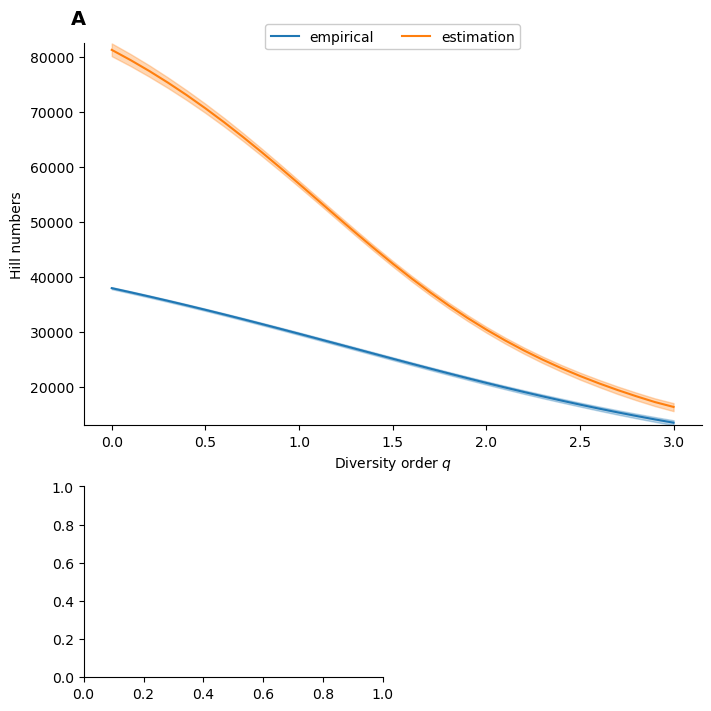

In [19]:
import matplotlib.gridspec as gridspec

fig = plt.figure(constrained_layout=True, figsize=(7, 7))
nrows, ncols = 3, 2
gspec = gridspec.GridSpec(ncols=ncols, nrows=nrows, figure=fig)

ax = plt.subplot(gspec[:2, :2])
hill_plot(emp, est, add_densities=False, ax=ax)
ax.text(-0.02, 1.05, "A", transform=ax.transAxes, fontweight='bold', fontsize=14)

ax2 = plt.subplot(gspec[2, 0])
accumulation_curve(abundance, accumulation, c0='C0', c1='C0',
                   xlabel='Documents', ylabel='works',
                   title=None, ax=ax2,
                   xlim=(0, max_steps))
ax2.tick_params(axis='y', which='minor', left=False)
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0, 0), useMathText=True)
ax2.set_ylabel("Works")
ax2.text(-0.05, 1.1, "B", transform=ax2.transAxes, fontweight='bold', fontsize=14)

ax3 = plt.subplot(gspec[2, 1])
sb.kdeplot(minsample_est['bootstrap'], ax=ax3, color="C0", fill=True)
ax3.axvline(minsample_est['richness'], color="C0")

ax3.set(xlabel='Min. add. sample')
ax3.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax3.ticklabel_format(style='sci', axis='x', scilimits=(0, 0), useMathText=True)
ax3.tick_params(axis='y', which='minor', left=True)
ax3.text(-0.05, 1.1, "C", transform=ax3.transAxes, fontweight='bold', fontsize=14)

plt.savefig('../outputs/all_comb.pdf');

In [20]:
assemblages = {}
for lit, df in lits.items():
    abundance = u.to_abundance(df['username'])
    assemblages[lit.title()] = abundance

In [21]:
for category, assemblage in assemblages.items():
    print('category:', category)
    print('  - original # works:', diversity(assemblage, method='chao1'))
    print('  - original # documents:', diversity(assemblage, method='minsample'))

category: Bahasa_Indonesia
  - original # works: 2575.1716537483117
  - original # documents: 56707.798702798704
category: PortuguêS_Brasileiro
  - original # works: 1851.1877636838976
  - original # documents: 25362.150891150894
category: Chinese
  - original # works: 1760.5478119228028
  - original # documents: 42789.00321800322
category: English
  - original # works: 69444.61663281126
  - original # documents: 1354852.4464804465
category: Spain
  - original # works: 6017.007159541954
  - original # documents: 94598.70893970894


/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.7610214057531266 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.20636944972648052 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.15217058653797721 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.53775640227832 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.9160690546268597 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")


In [22]:
wsurvival = {}
for category, assemblage in assemblages.items():
    wsurvival[category] = survival_ratio(assemblage, method='chao1')

100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 1090.94it/s]


In [23]:
%matplotlib inline

In [24]:
ax = multi_kde(wsurvival)
ax.legend(loc='upper left')
ax.set_xlabel('Survival ratio (works)')
ax.set_yticklabels([])
ax.tick_params(axis='y', which='both', left=False)
ax.spines['left'].set_visible(False)
plt.savefig('../outputs/survival_works_kde.pdf')

NameError: name 'multi_kde' is not defined

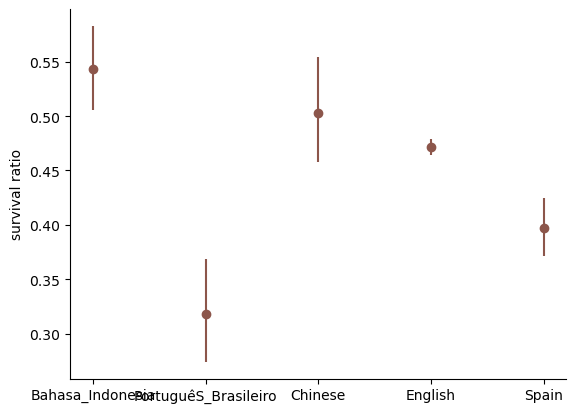

In [25]:
ax = survival_errorbar(wsurvival, ylabel="survival ratio")
ax.tick_params(axis='x', which='minor', bottom=False)
plt.savefig('../outputs/survival_works_error.pdf')

In [26]:
dsurvival = {}
for category, assemblage in assemblages.items():
    dsurvival[category] = survival_ratio(assemblage, method='minsample')

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.7610214057531266 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  0%|                                                  | 0/1000 [00:00<?, ?it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3516104493646708 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  0%|                                          | 1/1000 [00:00<13:04,  1.27it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.4410754687633016 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.16597939480197965 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: U

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.402704094445653 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5558852932153968 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.32054633287043544 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.41603436357218015 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5392117473129474 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiech

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.43134033225942403 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 11%|████▎                                  | 111/1000 [00:01<00:08, 109.85it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2804839793789142 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5827825616070186 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.34170391854058835 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.4800395406928146 > 0.1
  warnings.wa

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.23286115624432568 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 16%|██████▎                                | 161/1000 [00:02<00:06, 119.88it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5783903729934536 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.43036826639217907 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.4709164127452823 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5343742268141796 > 0.1
  warnings.wa

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.18307330680181622 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.375246490310019 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.412752726857434 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.21113606913058902 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 21%|████████▎                              | 212/1000 [00:02<00:06, 118.42it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.46803315248325816 > 0.1
  warnings.war

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5478861980864167 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.4170891104149632 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.11790224467767985 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.1839912840296165 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 26%|██████████▏                            | 260/1000 [00:03<00:06, 114.56it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2562857295124559 > 0.1
  warnings.war

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5731408016399655 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 31%|████████████▏                          | 311/1000 [00:03<00:05, 122.02it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.637272862073587 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5344118207794963 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.15994577996389125 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5372352107988263 > 0.1
  warnings.warn

 36%|██████████████                         | 360/1000 [00:03<00:05, 111.23it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2521599801220873 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5381295793486061 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.114247117726336 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.444551035790937 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5681415949584334 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.6542247994439094 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 42%|████████████████▍                      | 421/1000 [00:04<00:04, 116.32it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2048507680920011 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.10732193665535306 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.1954198033636203 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3769742483491427 > 0.1
  warnings.war

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.4962647141619527 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.48037211477640085 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.315385591255108 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.29945708446393837 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.4616045272741758 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 48%|█████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3559856452156964 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 54%|████████████████████▉                  | 536/1000 [00:05<00:03, 123.44it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2843015579164785 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2614518832451722 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.38588130422795075 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5175043259805534 > 0.1
  warnings.war

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.22314847266534343 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.18935288870125078 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3657320661113772 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 59%|██████████████████████▉                | 588/1000 [00:05<00:03, 124.40it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.4144505995500367 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.279857727658964 > 0.1
  warnings.war

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.1638122346412274 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3032311753013346 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.4781916493157041 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.20599311294790823 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.12471715997889987 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 65%|████████

 70%|███████████████████████████▍           | 703/1000 [00:06<00:02, 125.60it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.528075925711164 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.34220275802726974 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2672486971132457 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3136583051928028 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3363108047778951 > 0.1
  warnings.warn

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2733512042213988 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.33611789027781924 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 77%|█████████████████████████████▉         | 768/1000 [00:07<00:02, 114.59it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.41233246285264613 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3926137953494617 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.12101976540725445 > 0.1
  warnings.w

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.1750020722829504 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.35373849161624094 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.4407715429806558 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.30877140811571735 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 83%|████████████████████████████████▍      | 831/1000 [00:07<00:01, 120.25it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5169443126251281 > 0.1
  warnings.wa

 88%|██████████████████████████████████▎    | 881/1000 [00:08<00:01, 116.95it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3676686635662918 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5943411276530242 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.11687296741365572 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.16951787304788013 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.6438285956028267 > 0.1
  warnings.wa

 93%|████████████████████████████████████▍  | 934/1000 [00:08<00:00, 124.69it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2682231335020333 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.579585561008571 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.17472422888022265 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5353346889642125 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.549200083987671 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5064391144114779 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.29957214436944923 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.10684798171496368 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
100%|██████████████████████████████████████▉| 999/1000 [00:09<00:00, 120.86it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3328929344243079 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
100%|██████████████████████████████████████| 1000/1000 [00:09<00:00, 107.36it/s]
/Users/josiechen/Desktop/copia/estimators.py:561:

 10%|███▉                                    | 97/1000 [00:01<00:08, 110.14it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2712400525670091 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.17786106986022787 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.31616345952716074 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.22017179175600177 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.21032271385774948 > 0.1
  warnings.

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2908235935137782 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3005657994799549 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 15%|█████▉                                 | 153/1000 [00:01<00:06, 125.14it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.317012568060818 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.27789611099433387 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.10513692988752155 > 0.1
  warnings.war

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3271247136144666 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2817487158536096 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 21%|████████▏                              | 209/1000 [00:02<00:06, 129.02it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.22337779576810135 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3428061224731209 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.13984429753327277 > 0.1
  warnings.wa

 28%|██████████▋                            | 275/1000 [00:02<00:05, 126.30it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.11832319238965283 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.20338574679772137 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.24018403586160275 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.22085547315873555 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.30166988463315647 > 0.1
  warnings

 35%|█████████████▊                         | 353/1000 [00:03<00:05, 124.85it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.38169800099058193 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.22661232508471585 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.17962649367473205 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.11983924432570348 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.29065364731286536 > 0.1
  warnings

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.27760334492995753 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 43%|████████████████▊                      | 431/1000 [00:04<00:04, 124.25it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.12896964865285554 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2533780430785555 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.14316844016866526 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 44%|█████████████████▎                     | 444/1000 [00:04<00:04, 121.87it/s]/Users/josiechen/Desktop/copia/estimators.py:561:

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.12366504344390705 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.33789237007295014 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 52%|████████████████████▏                  | 517/1000 [00:04<00:04, 116.97it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.1941616553995118 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.13353342673872248 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2881220591334568 > 0.1
  warnings.w

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.22052143960172543 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 58%|██████████████████████▌                | 578/1000 [00:05<00:03, 118.25it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.19378656361732283 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.14417027887975564 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2882049084546452 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.33163199235787033 > 0.1
  warnings.

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3566974839741306 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.19949820656256634 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.22981741323383176 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 66%|█████████████████████████▊             | 663/1000 [00:06<00:02, 115.62it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2051705946068978 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.20196282669348875 > 0.1
  warnings.w

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2741902337911597 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.19109539812779985 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.17277575879415963 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 75%|█████████████████████████████▎         | 751/1000 [00:06<00:02, 121.78it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.28569536923532723 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.37770264732898795 > 0.1
  warnings.

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.1734938197187148 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.19622330379206687 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2529132962336007 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.15824787676683627 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 82%|████████████████████████████████▏      | 824/1000 [00:07<00:01, 112.89it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3726143082858471 > 0.1
  warnings.wa

 91%|███████████████████████████████████▌   | 913/1000 [00:08<00:00, 115.89it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.1056558848649729 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2790732610410487 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.18708321746453294 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.31232110127893975 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.363054757584905 > 0.1
  warnings.war

100%|██████████████████████████████████████| 1000/1000 [00:09<00:00, 109.65it/s]
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.15217058653797721 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  0%|                                                  | 0/1000 [00:00<?, ?it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.1889364009948622 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  0%|                                          | 1/1000 [00:01<17:06,  1.03s/it]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.19861893142660847 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3816631409972615 > 0.1
  warnings.warn(f"Tolerance criterion not met: {d

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.26230176550598117 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  5%|██▏                                      | 52/1000 [00:01<00:15, 62.66it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.19547214749218256 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.19707834222390375 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.32701404872204876 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.24072599333339895 > 0.1
  warnings

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.16676146451209206 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 12%|████▍                                  | 115/1000 [00:01<00:08, 109.01it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3370514381040266 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.1346035305523401 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.21487685984175187 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.23616675141420274 > 0.1
  warnings.w

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3495338505381369 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 18%|███████                                | 180/1000 [00:02<00:06, 121.19it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.20154060722416034 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.23133579661225667 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2619857576355571 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.13150148561544484 > 0.1
  warnings.w

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3298762218346383 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.11044007744749251 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3756171204204293 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2126701842280454 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 24%|█████████▌                             | 245/1000 [00:03<00:06, 122.60it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2127790001395624 > 0.1
  warnings.war

 30%|███████████▌                           | 297/1000 [00:03<00:05, 125.12it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.13515301284314774 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3044282116352406 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.368464093971852 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.33203983360544953 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.36554904381955566 > 0.1
  warnings.wa

 35%|█████████████▌                         | 349/1000 [00:03<00:05, 125.70it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3386551449475519 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3086469817044417 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3521413116304757 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3125239740948018 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.14517605920264032 > 0.1
  warnings.war

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.15729966503931792 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.23879212695828755 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.36886890765526914 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 41%|████████████████▏                      | 414/1000 [00:04<00:04, 122.30it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2508754608752497 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.32463930698213517 > 0.1
  warnings.

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.13242417803485296 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 48%|██████████████████▋                    | 479/1000 [00:04<00:04, 118.35it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.30412095274732565 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3537509166962991 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.15276372284279205 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.26151553938871075 > 0.1
  warnings.

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.18488272318427335 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.1350589825797215 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.18970372577314265 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3251167094804259 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.23859076509870647 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 55%|███████

 60%|███████████████████████▎               | 597/1000 [00:06<00:03, 108.19it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.13394737729686312 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.23787987294053892 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.24760619512562698 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3459476483567414 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3512727983343211 > 0.1
  warnings.w

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.16332524503559398 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.39572665188097744 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3474287755361729 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 67%|██████████████████████████▏            | 670/1000 [00:06<00:03, 104.48it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3402179536296899 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3938805114794377 > 0.1
  warnings.wa

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2387880257301731 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2901098302554601 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2965121185134194 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 74%|████████████████████████████▋          | 737/1000 [00:07<00:02, 102.63it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.21834783053782303 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3019456975234789 > 0.1
  warnings.war

 80%|███████████████████████████████        | 797/1000 [00:07<00:01, 113.38it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.19525217329100997 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.21760082969376526 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.29389622649614466 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.13191787106188713 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.18085688626160845 > 0.1
  warnings

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3285831458342727 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 88%|██████████████████████████████████▏    | 875/1000 [00:08<00:01, 124.14it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.191417964608263 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.32822755212691845 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.24729135384586698 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.24352385164274892 > 0.1
  warnings.wa

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.17472322102548787 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 95%|█████████████████████████████████████▏ | 954/1000 [00:09<00:00, 128.48it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3320120653916092 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.11807624124776339 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2120789223954489 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.24438009362165758 > 0.1
  warnings.w

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.725807047449052 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.408902067109011 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  2%|▉                                        | 22/1000 [00:01<00:36, 26.90it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.431441150023602 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.41934929031413 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.912866781000048 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.318201313843019 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.033220658428036 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  7%|██▊                                      | 69/1000 [00:01<00:11, 80.62it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.0398402067367 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.993488565320149 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.701103604398668 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5498080992838368 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.061117741977796 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 12%|████▌                                  | 117/1000 [00:02<00:08, 105.86it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.995333495084196 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.118510790052824 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.0344282625010237 > 0.1
  warnings.warn

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.302727618836798 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.79969609330874 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.244221867993474 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 16%|██████▍                                | 165/1000 [00:02<00:07, 110.05it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.560016658972017 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.2498717965791 > 0.1
  warnings.warn(f"Tol

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.107236635521986 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.698200026061386 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.796552298008464 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.36504185909871 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 21%|████████▎                              | 213/1000 [00:02<00:07, 110.34it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.90113674220629 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.14287544914987 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.950201214989647 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.0140588849317282 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.0833124479977414 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.97839969652705 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

 29%|███████████▍                           | 292/1000 [00:03<00:06, 108.52it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.2598428019555286 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.328956897021271 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.795294034411199 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.516663008602336 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.904756059288047 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.13332548737526 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.980059551540762 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.048208051477559 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 34%|█████████████▏                         | 337/1000 [00:04<00:06, 109.00it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.072661057463847 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.82246222079266 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.250438001239672 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.931360942544416 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.065748479682952 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.6712593525880948 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 38%|██████████████▉                        | 382/1000 [00:04<00:05, 106.19it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.952984975418076 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.317148243892007 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.0192541908472776 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.609933626954444 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.501033613691106 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.289025945821777 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 43%|███████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.41532934154384 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.895899567287415 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.036545326933265 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.9512815264752135 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.288432890665717 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

 50%|███████████████████▋                   | 504/1000 [00:05<00:04, 104.94it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.919397842721082 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.812925013480708 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.44155987072736 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.14130237698555 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.500969019951299 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.5143728927942 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.377195795648731 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 55%|█████████████████████▎                 | 548/1000 [00:06<00:04, 105.62it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.545434255502187 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.580663925968111 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.588759990176186 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.452220336650498 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.827312624431215 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.836834337562323 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.402794280438684 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 59%|███████████████████████                | 592/1000 [00:06<00:03, 106.02it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.08034098148346 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.082415580865927 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.579740780871361 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.032979099312797 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.7491604546085 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.46832510875538 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 64%|██████████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.6757604802260175 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.008281883550808 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.5237859572516754 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.279573832754977 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.8200311433756724 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 68%|███████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.930378078948706 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.242293757852167 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.9963000513380393 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.3602645378559828 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.187784020090476 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josieche

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.821538615389727 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.71294994582422 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.7085830060532317 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.398638782207854 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.1496201085392386 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.6824582004919648 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.602728970814496 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5018390566110611 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.347250110353343 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.485178975271992 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.481765394681133 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.22874801291618496 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.1415809046011418 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.763913283706643 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.853827484766953 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josieche

 89%|██████████████████████████████████▋    | 890/1000 [00:09<00:01, 104.71it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.823346922872588 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.783963608671911 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.541282275342382 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3343136738985777 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.277244471479207 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.2487143306061625 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.3306744977599 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 93%|████████████████████████████████████▍  | 934/1000 [00:09<00:00, 104.43it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.568588066380471 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.7251583149190992 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.8526846653549 > 0.1
  warnings.warn(f"Tol

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.75607183505781 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.609192721894942 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.088436019956134 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 98%|██████████████████████████████████████▏| 978/1000 [00:10<00:00, 105.17it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.1491292451974 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.408137388993055 > 0.1
  warnings.warn(f"Tol

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.11481323299813084 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  3%|█                                        | 27/1000 [00:01<00:32, 30.25it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.1169342468929244 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5777310627381667 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.3549208315016585 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.6064200692853774 > 0.1
  warnings.war

 12%|████▋                                  | 120/1000 [00:02<00:07, 111.59it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.3734238110409933 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.46353201601596083 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.46894542843074305 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.17425236121198395 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.5297958118317183 > 0.1
  warnings.w

 16%|██████▎                                | 161/1000 [00:02<00:06, 123.84it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.1437104829019518 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.9173221217497485 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.701603956935287 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.5301586190544185 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.1501383831346175 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.578412813032628 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 21%|████████▎                              | 213/1000 [00:02<00:06, 127.05it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.9755537300225114 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.9176675418493687 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.16887680839863606 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.47300158024881966 > 0.1
  warnings.war

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3178852167111472 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3563868938581436 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 27%|██████████▎                            | 266/1000 [00:03<00:05, 127.81it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.968402092854376 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3891601373979938 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.24100424340576865 > 0.1
  warnings.warn

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.9856206009280868 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.8448512208487955 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.000326694600517 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2963307207537582 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.1240995911648497 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.4290781861927826 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.6494023939158069 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 36%|██████████████                         | 359/1000 [00:03<00:04, 128.25it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.8625198448571609 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.222701808437705 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.0211014988526586 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.9410385238588788 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.32479799963039113 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 41%|████████████████                       | 411/1000 [00:04<00:04, 126.35it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.9317923755879747 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.392389923443261 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.188398557540495 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.6675275499728741 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.885602076217765 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 46%|██████████████████                     | 464/1000 [00:04<00:04, 126.60it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3017593035037862 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.12968617513251957 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.16294343798654154 > 0.1
  warnings.war

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.4398161428107414 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.133481966338877 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.7483075646523503 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 52%|████████████████████▏                  | 517/1000 [00:05<00:03, 126.14it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.3723701004346367 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.11133876487292582 > 0.1
  warnings.warn

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.821983856119914 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 61%|███████████████████████▋               | 608/1000 [00:05<00:03, 122.14it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.1048422371095512 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.10995007611927576 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.3093722202829667 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.1082641524481005 > 0.1
  warnings.warn

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5195758235277026 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 66%|█████████████████████████▋             | 660/1000 [00:06<00:02, 120.91it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.7661495989086688 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.3548449336230988 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3993902666552458 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.4022615356807364 > 0.1
  warnings.warn

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2622721769657801 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.857263209480152 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.0958329075438087 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.7622311289669597 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.165027485549217 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 71%|████████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.52877786829049 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 80%|███████████████████████████████▏       | 800/1000 [00:07<00:01, 119.21it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.595174050424248 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.4206399189133663 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.4880975203195703 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.8352738984249299 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.6407719865455874 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.13445917863282375 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5322116287934477 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.1232584641547874 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.0550960677137482 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 85%|█████████

 89%|██████████████████████████████████▋    | 891/1000 [00:08<00:00, 120.73it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.2760276250483003 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.48670058784773573 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.4039195802761242 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.429224998159043 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.1265043368766783 > 0.1
  warnings.warn

 94%|████████████████████████████████████▊  | 943/1000 [00:08<00:00, 121.10it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.22246883815387264 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.1000558142841328 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.144060437938606 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.6700297507122741 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.4193625836996944 > 0.1
  warnings.warn

/Users/josiechen/desktop/copia/plot.py:257: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(assemblage['bootstrap'], label=label,
/Users/josiechen/desktop/copia/plot.py:257: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(assemblage['bootstrap'], label=label,
/Users/josiechen/desktop/copia/plot.py:257: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(assemblage['bootstrap'], label=label,
/Users/josiechen/desktop/copia/plot.py:257: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(assemblage['bootstrap'], label=lab

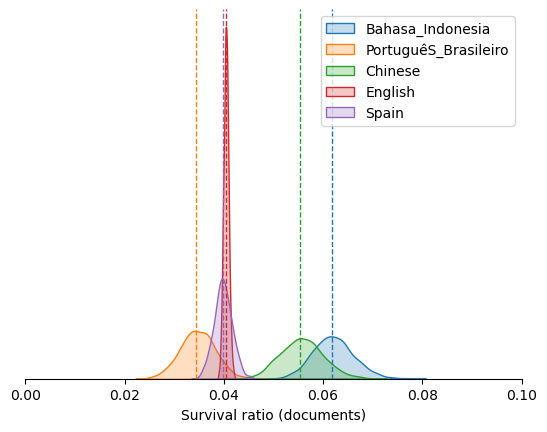

In [29]:
ax = multi_kde_plot(dsurvival)
ax.legend(loc='upper right')
ax.set_xlim((0, 0.1))
ax.set_yticklabels([])
ax.tick_params(axis='y', which='both', left=False)
ax.spines['left'].set_visible(False)
ax.set_xlabel('Survival ratio (documents)')
plt.savefig('../outputs/survival_docs_kde.pdf')

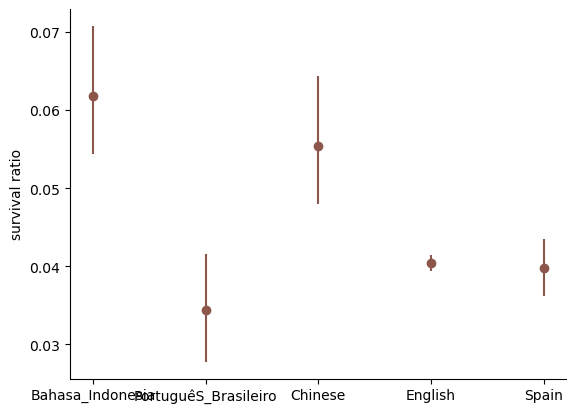

In [30]:
ax = survival_errorbar(dsurvival, ylabel="survival ratio")
ax.tick_params(axis='x', which='minor', bottom=False)
plt.savefig('../outputs/survival_docs_error.pdf')

In [31]:
for c in 'CH1 CH1-lCI CH1-uCI MS MS-lCI MS-uCI'.split():
    stats_df[c] = 0.0

# for individual languages:
for lang in wsurvival:
    stats_df.loc[lang.lower(), 'CH1'] = wsurvival[lang]['survival']
    stats_df.loc[lang.lower(), 'CH1-lCI'] = wsurvival[lang]['lci']
    stats_df.loc[lang.lower(), 'CH1-uCI'] = wsurvival[lang]['uci']

for lang in dsurvival:
    stats_df.loc[lang.lower(), 'MS'] = dsurvival[lang]['survival']
    stats_df.loc[lang.lower(), 'MS-lCI'] = dsurvival[lang]['lci']
    stats_df.loc[lang.lower(), 'MS-uCI'] = dsurvival[lang]['uci']
    
# for union:
stats_df.loc['all', 'CH1'] = wsurvival_all['survival']
stats_df.loc['all', 'CH1-lCI'] = wsurvival_all['lci']
stats_df.loc['all', 'CH1-uCI'] = wsurvival_all['uci']

stats_df.loc['all', 'MS'] = dsurvival_all['survival']
stats_df.loc['all', 'MS-lCI'] = dsurvival_all['lci']
stats_df.loc['all', 'MS-uCI'] = dsurvival_all['uci']

stats_df.round(3)

f1   f2     S      n   repo    CH1  CH1-lCI  CH1-uCI  \
language                                                                       
bahasa_indonesia        34   31   287   3505   1398  0.543    0.506    0.583   
português_brasileiro   79   47   216    871    589  0.318    0.274    0.369   
chinese                 32   40   301   2371    885  0.503    0.458    0.554   
english                  2    3   303  54772  32731  0.471    0.464    0.479   
spain                   23   36   272   3759   2389  0.397    0.371    0.425   
all                    170  157  1379  65278   None  0.467    0.460    0.474   

                          MS  MS-lCI  MS-uCI  
language                                      
bahasa_indonesia       0.062   0.054   0.071  
português_brasileiro  0.034   0.028   0.042  
chinese                0.055   0.048   0.064  
english                0.040   0.039   0.041  
spain                  0.040   0.036   0.043  
all                    0.039   0.038   0.040

In [34]:
hill_est = {}
for lang, assemblage in assemblages.items():
    emp, est = hill_numbers(assemblage, n_iter=1000)
    hill_est[lang] = est


 42%|████████████████▊                       | 420/1000 [01:04<01:25,  6.78it/s]

  6%|██▌                                    | 647/10000 [01:39<26:54,  5.79it/s]

  6%|██▌                                    | 648/10000 [01:39<25:18,  6.16it/s]

 43%|█████████████████                       | 426/1000 [01:05<01:32,  6.20it/s]

  6%|██▌                                    | 649/10000 [01:39<24:59,  6.24it/s]

  6%|██▌                                    | 650/10000 [01:40<24:46,  6.29it/s]

100%|██████████████████████████████████████| 1000/1000 [00:01<00:00, 703.92it/s]

 43%|█████████████████▏                      | 430/1000 [01:06<01:28,  6.43it/s]

  7%|██▌                                    | 658/10000 [01:41<25:27,  6.12it/s]

  7%|██▌                                    | 659/10000 [01:41<25:00,  6.22it/s]

  7%|██▌                                    | 660/10000 [01:41<25:09,  6.19it/s]

  7%|██▌                                    | 661/10000 [01:41<25:02,  6.21it/s]

  7%|██▌       

  7%|██▉                                    | 742/10000 [01:54<24:37,  6.27it/s]

  7%|██▉                                    | 743/10000 [01:55<24:39,  6.26it/s]

  7%|██▉                                    | 744/10000 [01:55<24:05,  6.40it/s]

  7%|██▉                                    | 745/10000 [01:55<23:46,  6.49it/s]

  7%|██▉                                    | 746/10000 [01:55<23:12,  6.65it/s]

  7%|██▉                                    | 747/10000 [01:55<23:51,  6.46it/s]

  7%|██▉                                    | 748/10000 [01:55<24:42,  6.24it/s]

  7%|██▉                                    | 749/10000 [01:56<24:56,  6.18it/s]

  8%|██▉                                    | 750/10000 [01:56<24:29,  6.29it/s]

  8%|██▉                                    | 751/10000 [01:56<24:28,  6.30it/s]

  8%|██▉                                    | 752/10000 [01:56<23:56,  6.44it/s]

  8%|██▉                                    | 753/10000 [01:56<24:04,  6.40it/s]

  8%|██▉        

 61%|████████████████████████▌               | 614/1000 [01:35<01:02,  6.18it/s]

 62%|████████████████████████▌               | 615/1000 [01:35<01:02,  6.16it/s]

 62%|████████████████████████▋               | 616/1000 [01:36<01:02,  6.17it/s]

 62%|████████████████████████▋               | 617/1000 [01:36<01:01,  6.25it/s]

 62%|████████████████████████▋               | 618/1000 [01:36<01:01,  6.24it/s]

 62%|████████████████████████▊               | 619/1000 [01:36<00:58,  6.46it/s]

 62%|████████████████████████▊               | 620/1000 [01:36<00:59,  6.39it/s]

 62%|████████████████████████▊               | 621/1000 [01:36<00:59,  6.33it/s]

 62%|████████████████████████▉               | 622/1000 [01:37<01:00,  6.23it/s]

 62%|████████████████████████▉               | 623/1000 [01:37<01:00,  6.21it/s]

 62%|████████████████████████▉               | 624/1000 [01:37<01:00,  6.26it/s]

 62%|█████████████████████████               | 625/1000 [01:37<01:00,  6.24it/s]

  8%|███▎       

  9%|███▋                                   | 932/10000 [02:25<24:55,  6.07it/s]

  9%|███▋                                   | 933/10000 [02:25<24:37,  6.14it/s]

  9%|███▋                                   | 934/10000 [02:26<24:42,  6.12it/s]

  9%|███▋                                   | 935/10000 [02:26<24:11,  6.25it/s]

  9%|███▋                                   | 936/10000 [02:26<24:07,  6.26it/s]

  9%|███▋                                   | 937/10000 [02:26<24:04,  6.27it/s]

  9%|███▋                                   | 938/10000 [02:26<24:31,  6.16it/s]

  9%|███▋                                   | 939/10000 [02:26<24:00,  6.29it/s]

  9%|███▋                                   | 940/10000 [02:27<23:56,  6.31it/s]

  9%|███▋                                   | 941/10000 [02:27<23:57,  6.30it/s]

  9%|███▋                                   | 942/10000 [02:27<24:51,  6.07it/s]

  9%|███▋                                   | 943/10000 [02:27<24:32,  6.15it/s]

  9%|███▋       

 10%|███▉                                  | 1027/10000 [02:41<24:16,  6.16it/s]

 10%|███▉                                  | 1028/10000 [02:41<24:19,  6.15it/s]

 81%|████████████████████████████████▎       | 807/1000 [02:07<00:30,  6.30it/s]

 10%|███▉                                  | 1030/10000 [02:41<24:29,  6.10it/s]

 10%|███▉                                  | 1031/10000 [02:41<24:29,  6.10it/s]

 81%|████████████████████████████████▍       | 810/1000 [02:07<00:30,  6.23it/s]

 81%|████████████████████████████████▍       | 811/1000 [02:07<00:30,  6.19it/s]

 81%|████████████████████████████████▍       | 812/1000 [02:08<00:30,  6.16it/s]

 81%|████████████████████████████████▌       | 813/1000 [02:08<00:30,  6.15it/s]

 10%|███▉                                  | 1036/10000 [02:42<24:38,  6.06it/s]

 10%|███▉                                  | 1037/10000 [02:42<24:54,  6.00it/s]

 82%|████████████████████████████████▋       | 816/1000 [02:08<00:30,  6.11it/s]

 82%|███████████

 90%|████████████████████████████████████    | 900/1000 [02:22<00:15,  6.30it/s]

 90%|████████████████████████████████████    | 901/1000 [02:22<00:16,  6.17it/s]

 11%|████▎                                 | 1124/10000 [02:57<24:08,  6.13it/s]

 11%|████▎                                 | 1125/10000 [02:57<24:25,  6.05it/s]

 11%|████▎                                 | 1126/10000 [02:57<24:40,  5.99it/s]

 11%|████▎                                 | 1127/10000 [02:57<24:31,  6.03it/s]

 11%|████▎                                 | 1128/10000 [02:57<24:54,  5.94it/s]

 11%|████▎                                 | 1129/10000 [02:57<25:16,  5.85it/s]

 91%|████████████████████████████████████▎   | 908/1000 [02:23<00:15,  6.00it/s]

 91%|████████████████████████████████████▎   | 909/1000 [02:23<00:14,  6.10it/s]

 91%|████████████████████████████████████▍   | 910/1000 [02:23<00:14,  6.04it/s]

 91%|████████████████████████████████████▍   | 911/1000 [02:24<00:14,  6.00it/s]

 91%|███████████

 99%|███████████████████████████████████████▊| 994/1000 [02:37<00:00,  6.13it/s]

100%|███████████████████████████████████████▊| 995/1000 [02:37<00:00,  6.13it/s]

 12%|████▋                                 | 1218/10000 [03:12<23:31,  6.22it/s]

 12%|████▋                                 | 1219/10000 [03:12<23:56,  6.11it/s]

 12%|████▋                                 | 1220/10000 [03:12<23:41,  6.17it/s]

 12%|████▋                                 | 1221/10000 [03:12<23:38,  6.19it/s]

 56%|██████████████████████▌                 | 565/1000 [01:32<01:11,  6.08it/s]

 12%|████▋                                 | 1222/10000 [03:13<23:35,  6.20it/s]

 12%|████▋                                 | 1224/10000 [03:13<22:18,  6.55it/s]

 12%|████▋                                 | 1225/10000 [03:13<22:42,  6.44it/s]

 12%|████▋                                 | 1226/10000 [03:13<22:07,  6.61it/s]

 12%|████▋                                 | 1227/10000 [03:13<22:02,  6.63it/s]

 12%|████▋      

 14%|█████▎                                | 1397/10000 [03:39<21:15,  6.75it/s]

 14%|█████▎                                | 1398/10000 [03:39<20:32,  6.98it/s]

 14%|█████▎                                | 1399/10000 [03:39<20:59,  6.83it/s]

 14%|█████▎                                | 1400/10000 [03:40<20:52,  6.87it/s]

 14%|█████▎                                | 1401/10000 [03:40<21:24,  6.69it/s]

 14%|█████▎                                | 1402/10000 [03:40<21:31,  6.66it/s]

 14%|█████▎                                | 1403/10000 [03:40<21:25,  6.69it/s]

 14%|█████▎                                | 1404/10000 [03:40<22:03,  6.50it/s]

 14%|█████▎                                | 1405/10000 [03:40<21:33,  6.64it/s]

 14%|█████▎                                | 1406/10000 [03:40<21:17,  6.73it/s]

 14%|█████▎                                | 1407/10000 [03:41<21:17,  6.73it/s]

 14%|█████▎                                | 1408/10000 [03:41<21:26,  6.68it/s]

 14%|█████▎     

 16%|██████                                | 1582/10000 [04:07<21:05,  6.65it/s]

 16%|██████                                | 1583/10000 [04:07<21:31,  6.52it/s]

 16%|██████                                | 1584/10000 [04:07<21:01,  6.67it/s]

 16%|██████                                | 1585/10000 [04:07<20:45,  6.76it/s]

 16%|██████                                | 1586/10000 [04:07<20:53,  6.71it/s]

 16%|██████                                | 1587/10000 [04:08<21:07,  6.64it/s]

 16%|██████                                | 1588/10000 [04:08<21:37,  6.48it/s]

 16%|██████                                | 1589/10000 [04:08<21:20,  6.57it/s]

 16%|██████                                | 1590/10000 [04:08<22:00,  6.37it/s]

 16%|██████                                | 1591/10000 [04:08<21:59,  6.37it/s]

 16%|██████                                | 1592/10000 [04:08<21:14,  6.60it/s]

 16%|██████                                | 1593/10000 [04:09<21:22,  6.56it/s]

 16%|██████     

 53%|█████████████████████▏                  | 531/1000 [00:12<00:10, 45.39it/s]

 17%|██████▋                               | 1749/10000 [04:32<20:49,  6.60it/s]

 18%|██████▋                               | 1750/10000 [04:32<20:15,  6.79it/s]

 18%|██████▋                               | 1751/10000 [04:32<19:36,  7.01it/s]

 55%|██████████████████████                  | 551/1000 [00:12<00:09, 45.73it/s]

 18%|██████▋                               | 1752/10000 [04:33<19:34,  7.02it/s]

 18%|██████▋                               | 1753/10000 [04:33<19:40,  6.98it/s]

 18%|██████▋                               | 1754/10000 [04:33<19:33,  7.03it/s]

 57%|██████████████████████▊                 | 571/1000 [00:13<00:09, 46.37it/s]

 18%|██████▋                               | 1755/10000 [04:33<20:10,  6.81it/s]

 18%|██████▋                               | 1756/10000 [04:33<20:27,  6.71it/s]

 18%|██████▋                               | 1757/10000 [04:33<20:02,  6.86it/s]

 59%|███████████

 19%|███████▏                              | 1907/10000 [04:56<20:16,  6.66it/s]

 19%|███████▎                              | 1908/10000 [04:56<20:42,  6.52it/s]

 19%|███████▎                              | 1909/10000 [04:56<20:23,  6.61it/s]

 11%|████▍                                   | 111/1000 [00:12<01:30,  9.87it/s]

 19%|███████▎                              | 1910/10000 [04:57<20:22,  6.62it/s]

 19%|███████▎                              | 1911/10000 [04:57<20:11,  6.68it/s]

 11%|████▌                                   | 114/1000 [00:12<01:32,  9.62it/s]

 19%|███████▎                              | 1912/10000 [04:57<20:20,  6.63it/s]

 19%|███████▎                              | 1913/10000 [04:57<19:48,  6.81it/s]

 19%|███████▎                              | 1914/10000 [04:57<20:18,  6.64it/s]

 19%|███████▎                              | 1915/10000 [04:57<20:13,  6.66it/s]

 19%|███████▎                              | 1916/10000 [04:57<19:59,  6.74it/s]

 19%|███████▎   

 21%|███████▊                              | 2056/10000 [05:19<20:11,  6.56it/s]

 32%|████████████▉                           | 323/1000 [00:34<01:09,  9.69it/s]

 21%|███████▊                              | 2057/10000 [05:19<20:24,  6.49it/s]

 21%|███████▊                              | 2058/10000 [05:19<20:30,  6.45it/s]

 21%|███████▊                              | 2060/10000 [05:19<20:30,  6.45it/s]

 33%|█████████████▏                          | 329/1000 [00:35<01:09,  9.72it/s]

 21%|███████▊                              | 2061/10000 [05:19<20:15,  6.53it/s]

 21%|███████▊                              | 2062/10000 [05:20<19:51,  6.66it/s]

 21%|███████▊                              | 2063/10000 [05:20<20:07,  6.57it/s]

 21%|███████▊                              | 2064/10000 [05:20<20:35,  6.42it/s]

 21%|███████▊                              | 2065/10000 [05:20<20:17,  6.52it/s]

 21%|███████▊                              | 2066/10000 [05:20<20:31,  6.44it/s]

 21%|███████▊   

 22%|████████▍                             | 2213/10000 [05:42<20:21,  6.38it/s]

 55%|█████████████████████▉                  | 549/1000 [00:58<00:47,  9.47it/s]

 22%|████████▍                             | 2214/10000 [05:42<19:59,  6.49it/s]

 22%|████████▍                             | 2215/10000 [05:43<19:45,  6.56it/s]

 22%|████████▍                             | 2216/10000 [05:43<19:33,  6.63it/s]

 55%|██████████████████████                  | 553/1000 [00:58<00:50,  8.89it/s]

 22%|████████▍                             | 2217/10000 [05:43<19:52,  6.52it/s]

 22%|████████▍                             | 2218/10000 [05:43<19:24,  6.69it/s]

 22%|████████▍                             | 2219/10000 [05:43<18:45,  6.91it/s]

 22%|████████▍                             | 2220/10000 [05:43<18:57,  6.84it/s]

 22%|████████▍                             | 2221/10000 [05:43<19:17,  6.72it/s]

 22%|████████▍                             | 2222/10000 [05:44<19:16,  6.72it/s]

 22%|████████▍  

 24%|█████████                             | 2374/10000 [06:06<18:29,  6.87it/s]

 24%|█████████                             | 2375/10000 [06:06<18:38,  6.82it/s]

 78%|███████████████████████████████▏        | 780/1000 [01:22<00:22,  9.61it/s]

 24%|█████████                             | 2376/10000 [06:07<18:52,  6.73it/s]

 24%|█████████                             | 2377/10000 [06:07<18:54,  6.72it/s]

 78%|███████████████████████████████▎        | 783/1000 [01:22<00:23,  9.42it/s]

 24%|█████████                             | 2379/10000 [06:07<18:42,  6.79it/s]

 24%|█████████                             | 2380/10000 [06:07<18:31,  6.85it/s]

 79%|███████████████████████████████▍        | 787/1000 [01:23<00:21,  9.74it/s]

 24%|█████████                             | 2381/10000 [06:07<18:32,  6.85it/s]

 24%|█████████                             | 2382/10000 [06:07<18:26,  6.89it/s]

 79%|███████████████████████████████▌        | 790/1000 [01:23<00:21,  9.63it/s]

 24%|█████████  

 26%|█████████▋                            | 2553/10000 [06:33<20:16,  6.12it/s]

 26%|█████████▋                            | 2554/10000 [06:33<20:02,  6.19it/s]

 26%|█████████▋                            | 2555/10000 [06:33<19:35,  6.33it/s]

 26%|█████████▋                            | 2556/10000 [06:34<18:41,  6.64it/s]

  5%|█▉                                       | 46/1000 [00:01<00:16, 56.32it/s]

 26%|█████████▋                            | 2557/10000 [06:34<18:41,  6.64it/s]

 26%|█████████▋                            | 2558/10000 [06:34<18:26,  6.73it/s]

  9%|███▌                                    | 90/1000 [00:01<00:08, 101.39it/s]

 26%|█████████▋                            | 2559/10000 [06:34<17:53,  6.93it/s]

 26%|█████████▋                            | 2560/10000 [06:34<18:06,  6.85it/s]

 26%|█████████▋                            | 2561/10000 [06:34<18:11,  6.82it/s]

 15%|█████▋                                 | 147/1000 [00:02<00:06, 127.53it/s]

 26%|█████████▋ 

 42%|████████████████                      | 4234/10000 [10:47<15:04,  6.38it/s]

 42%|████████████████▏                     | 4248/10000 [10:49<14:11,  6.76it/s]

 43%|████████████████▏                     | 4262/10000 [10:51<14:04,  6.80it/s]

 43%|████████████████▏                     | 4275/10000 [10:53<14:31,  6.57it/s]

 43%|████████████████▎                     | 4288/10000 [10:55<14:31,  6.55it/s]

 43%|████████████████▎                     | 4302/10000 [10:58<14:42,  6.45it/s]

 43%|████████████████▍                     | 4315/10000 [11:00<14:34,  6.50it/s]

 43%|████████████████▍                     | 4331/10000 [11:02<13:28,  7.01it/s]

 43%|████████████████▌                     | 4345/10000 [11:04<14:06,  6.68it/s]

 44%|████████████████▌                     | 4359/10000 [11:06<13:55,  6.75it/s]

 44%|████████████████▌                     | 4372/10000 [11:08<14:13,  6.59it/s]

 44%|████████████████▋                     | 4386/10000 [11:10<13:44,  6.81it/s]

 44%|███████████

 68%|█████████████████████████▊            | 6794/10000 [17:15<07:55,  6.74it/s]

 68%|█████████████████████████▊            | 6808/10000 [17:17<08:01,  6.64it/s]

 68%|█████████████████████████▉            | 6821/10000 [17:19<07:53,  6.72it/s]

 68%|█████████████████████████▉            | 6834/10000 [17:21<08:18,  6.36it/s]

 68%|██████████████████████████            | 6847/10000 [17:23<08:10,  6.42it/s]

 69%|██████████████████████████            | 6861/10000 [17:25<07:40,  6.82it/s]

 69%|██████████████████████████            | 6874/10000 [17:27<07:48,  6.68it/s]

 69%|██████████████████████████▏           | 6888/10000 [17:29<08:10,  6.35it/s]

 69%|██████████████████████████▏           | 6901/10000 [17:31<08:06,  6.37it/s]

 69%|██████████████████████████▎           | 6915/10000 [17:34<08:02,  6.39it/s]

 69%|██████████████████████████▎           | 6928/10000 [17:36<07:42,  6.65it/s]

 69%|██████████████████████████▍           | 6941/10000 [17:37<07:47,  6.55it/s]

 70%|███████████

 93%|███████████████████████████████████▍  | 9334/10000 [23:41<01:37,  6.80it/s]

 93%|███████████████████████████████████▌  | 9347/10000 [23:43<01:41,  6.44it/s]

 94%|███████████████████████████████████▌  | 9361/10000 [23:45<01:33,  6.82it/s]

 94%|███████████████████████████████████▌  | 9374/10000 [23:47<01:32,  6.74it/s]

 94%|███████████████████████████████████▋  | 9387/10000 [23:49<01:34,  6.47it/s]

 94%|███████████████████████████████████▋  | 9401/10000 [23:51<01:38,  6.08it/s]

 94%|███████████████████████████████████▊  | 9416/10000 [23:53<01:30,  6.47it/s]

 94%|███████████████████████████████████▊  | 9430/10000 [23:55<01:29,  6.38it/s]

 94%|███████████████████████████████████▉  | 9443/10000 [23:57<01:18,  7.10it/s]

 95%|███████████████████████████████████▉  | 9457/10000 [23:59<01:19,  6.84it/s]

 95%|███████████████████████████████████▉  | 9472/10000 [24:02<01:18,  6.77it/s]

 95%|████████████████████████████████████  | 9485/10000 [24:04<01:15,  6.83it/s]

 95%|███████████

 67%|██████████████████████████▉             | 674/1000 [23:03<10:35,  1.95s/it]

 68%|███████████████████████████             | 675/1000 [23:05<10:32,  1.95s/it]

 68%|███████████████████████████             | 676/1000 [23:07<10:31,  1.95s/it]

 68%|███████████████████████████             | 677/1000 [23:09<10:21,  1.92s/it]

 68%|███████████████████████████             | 678/1000 [23:11<10:21,  1.93s/it]

 68%|███████████████████████████▏            | 679/1000 [23:13<10:22,  1.94s/it]

 68%|███████████████████████████▏            | 680/1000 [23:15<10:29,  1.97s/it]

 68%|███████████████████████████▏            | 681/1000 [23:17<10:33,  1.99s/it]

 68%|███████████████████████████▎            | 682/1000 [23:19<10:36,  2.00s/it]

 68%|███████████████████████████▎            | 683/1000 [23:21<10:22,  1.96s/it]

 68%|███████████████████████████▎            | 684/1000 [23:23<10:03,  1.91s/it]

 68%|███████████████████████████▍            | 685/1000 [23:25<10:05,  1.92s/it]

 69%|███████████

 86%|██████████████████████████████████▍     | 860/1000 [29:11<04:44,  2.04s/it]

 86%|██████████████████████████████████▍     | 861/1000 [29:13<04:35,  1.98s/it]

 86%|██████████████████████████████████▍     | 862/1000 [29:15<04:25,  1.92s/it]

 86%|██████████████████████████████████▌     | 863/1000 [29:17<04:28,  1.96s/it]

 86%|██████████████████████████████████▌     | 864/1000 [29:19<04:25,  1.95s/it]

 86%|██████████████████████████████████▌     | 865/1000 [29:20<04:20,  1.93s/it]

 87%|██████████████████████████████████▋     | 866/1000 [29:22<04:15,  1.91s/it]

 87%|██████████████████████████████████▋     | 867/1000 [29:24<04:21,  1.96s/it]

 87%|██████████████████████████████████▋     | 868/1000 [29:26<04:17,  1.95s/it]

 87%|██████████████████████████████████▊     | 869/1000 [29:28<04:13,  1.94s/it]

 87%|██████████████████████████████████▊     | 870/1000 [29:30<04:14,  1.95s/it]

 87%|██████████████████████████████████▊     | 871/1000 [29:32<04:13,  1.96s/it]

 87%|███████████

  4%|█▋                                       | 42/1000 [00:05<01:46,  8.96it/s]

  4%|█▊                                       | 43/1000 [00:05<01:46,  9.02it/s]

  4%|█▊                                       | 44/1000 [00:05<01:43,  9.20it/s]

  4%|█▊                                       | 45/1000 [00:05<01:42,  9.34it/s]

  5%|█▉                                       | 46/1000 [00:05<01:42,  9.29it/s]

  5%|█▉                                       | 47/1000 [00:05<01:46,  8.98it/s]

  5%|█▉                                       | 48/1000 [00:06<01:45,  9.02it/s]

  5%|██                                       | 49/1000 [00:06<01:44,  9.06it/s]

  5%|██                                       | 50/1000 [00:06<01:46,  8.95it/s]

  5%|██                                       | 51/1000 [00:06<01:48,  8.75it/s]

  5%|██▏                                      | 52/1000 [00:06<01:46,  8.87it/s]

  5%|██▏                                      | 53/1000 [00:06<01:45,  8.95it/s]

  5%|██▏        

 24%|█████████▊                              | 244/1000 [00:27<01:22,  9.12it/s]

 24%|█████████▊                              | 245/1000 [00:27<01:21,  9.28it/s]

 25%|█████████▊                              | 246/1000 [00:27<01:22,  9.10it/s]

 25%|█████████▉                              | 248/1000 [00:27<01:18,  9.60it/s]

 25%|█████████▉                              | 249/1000 [00:28<01:19,  9.48it/s]

 25%|██████████                              | 250/1000 [00:28<01:19,  9.40it/s]

 25%|██████████                              | 251/1000 [00:28<01:20,  9.34it/s]

 25%|██████████                              | 252/1000 [00:28<01:19,  9.43it/s]

 25%|██████████▏                             | 254/1000 [00:28<01:19,  9.44it/s]

 26%|██████████▏                             | 255/1000 [00:28<01:18,  9.50it/s]

 26%|██████████▏                             | 256/1000 [00:28<01:19,  9.41it/s]

 26%|██████████▎                             | 257/1000 [00:28<01:19,  9.35it/s]

 26%|██████████▎

 45%|█████████████████▉                      | 448/1000 [00:49<00:59,  9.22it/s]

 45%|█████████████████▉                      | 449/1000 [00:49<00:59,  9.33it/s]

 45%|██████████████████                      | 451/1000 [00:50<00:56,  9.71it/s]

 45%|██████████████████                      | 452/1000 [00:50<00:56,  9.70it/s]

 45%|██████████████████▏                     | 454/1000 [00:50<00:55,  9.80it/s]

 46%|██████████████████▏                     | 455/1000 [00:50<00:57,  9.54it/s]

 46%|██████████████████▏                     | 456/1000 [00:50<00:56,  9.57it/s]

 46%|██████████████████▎                     | 457/1000 [00:50<00:58,  9.21it/s]

 46%|██████████████████▎                     | 458/1000 [00:50<00:59,  9.07it/s]

 46%|██████████████████▎                     | 459/1000 [00:51<00:59,  9.10it/s]

 46%|██████████████████▍                     | 460/1000 [00:51<01:00,  8.98it/s]

 46%|██████████████████▍                     | 461/1000 [00:51<01:00,  8.91it/s]

 46%|███████████

 65%|██████████████████████████              | 650/1000 [01:12<00:37,  9.26it/s]

 65%|██████████████████████████              | 651/1000 [01:12<00:37,  9.35it/s]

 65%|██████████████████████████              | 652/1000 [01:12<00:37,  9.31it/s]

 65%|██████████████████████████              | 653/1000 [01:12<00:36,  9.40it/s]

 65%|██████████████████████████▏             | 654/1000 [01:12<00:37,  9.33it/s]

 66%|██████████████████████████▏             | 655/1000 [01:12<00:37,  9.29it/s]

 66%|██████████████████████████▏             | 656/1000 [01:12<00:38,  8.98it/s]

 66%|██████████████████████████▎             | 657/1000 [01:12<00:38,  8.91it/s]

 66%|██████████████████████████▎             | 658/1000 [01:13<00:38,  8.99it/s]

 66%|██████████████████████████▎             | 659/1000 [01:13<00:37,  9.16it/s]

 66%|██████████████████████████▍             | 660/1000 [01:13<00:37,  9.17it/s]

 66%|██████████████████████████▍             | 661/1000 [01:13<00:37,  9.03it/s]

 66%|███████████

 86%|██████████████████████████████████▎     | 858/1000 [01:34<00:15,  9.42it/s]

 86%|██████████████████████████████████▍     | 860/1000 [01:35<00:14,  9.42it/s]

 86%|██████████████████████████████████▍     | 861/1000 [01:35<00:14,  9.36it/s]

 86%|██████████████████████████████████▍     | 862/1000 [01:35<00:14,  9.31it/s]

 86%|██████████████████████████████████▌     | 863/1000 [01:35<00:14,  9.28it/s]

 86%|██████████████████████████████████▌     | 864/1000 [01:35<00:14,  9.12it/s]

 86%|██████████████████████████████████▌     | 865/1000 [01:35<00:15,  9.00it/s]

 87%|██████████████████████████████████▋     | 867/1000 [01:35<00:14,  9.29it/s]

 87%|██████████████████████████████████▊     | 869/1000 [01:36<00:13,  9.44it/s]

 87%|██████████████████████████████████▊     | 870/1000 [01:36<00:14,  9.27it/s]

 87%|██████████████████████████████████▊     | 871/1000 [01:36<00:14,  9.13it/s]

 87%|██████████████████████████████████▉     | 872/1000 [01:36<00:14,  9.07it/s]

 87%|███████████

In [36]:
evennesses = {l:evenness(hill_est[l]) for l in hill_est}

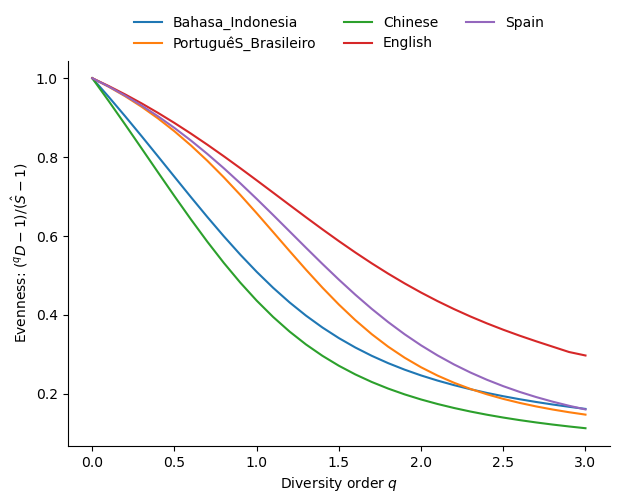

In [37]:
ax = evenness_plot(evennesses, figsize=(7, 5))
ax.tick_params(axis='y', which='minor', left=True)
lines, labels = ax.get_legend_handles_labels()
ax.set_title(None)
ax.legend(lines, labels, loc = 'upper center', ncol=3, bbox_to_anchor=(0.5, 1.15), frameon=False)
plt.savefig('../outputs/evenness.pdf')

KeyError: 'chinese'

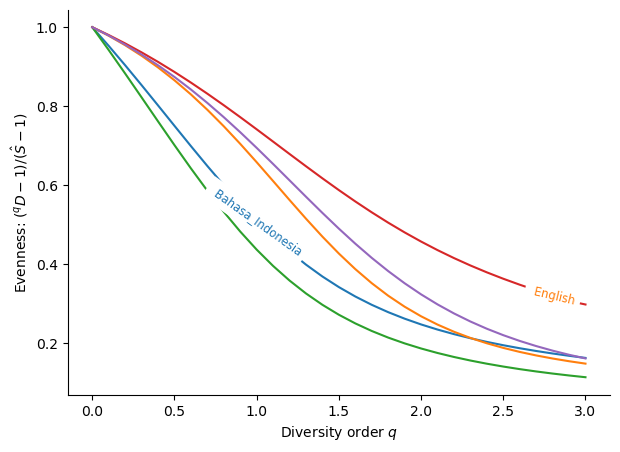

In [39]:
ax = evenness_plot(evennesses, figsize=(7, 5))
ax.tick_params(axis='y', which='minor', left=True)
lines, labels = ax.get_legend_handles_labels()
ax.set_title(None)
# ax.legend(lines, labels, loc = 'upper center', ncol=3, bbox_to_anchor=(0.5, 1.15), frameon=False)
ax.get_legend().remove()

qs = np.arange(0, 3.1, 0.1)

ax.text(qs[10], evennesses['Bahasa_Indonesia'][10], " " + "Bahasa_Indonesia",
        size="small", bbox=dict(facecolor='white', edgecolor="None", alpha=1),
        color="C0", ha="center", va="center", rotation=-35.5)

ax.text(qs[28], evennesses['English'][28], " " + "English",
        size="small", bbox=dict(facecolor='white', edgecolor="None", alpha=1),
        color="C1", ha="center", va="center", rotation=-13.5)

ax.text(qs[8], evennesses['chinese'][8], " " + "chinese",
        size="small", bbox=dict(facecolor='white', edgecolor="None", alpha=1),
        color="C2", ha="center", va="center", rotation=-42.5)

ax.text(qs[20], evennesses['Português_brasileiro'][20], " " + "Português_brasileiro",
        size="small", bbox=dict(facecolor='white', edgecolor="None", alpha=1),
        color="C3", ha="center", va="center", rotation=-16.5)

ax.text(qs[15], evennesses['spain'][15], " " + "spain",
        size="small", bbox=dict(facecolor='white', edgecolor="None", alpha=1),
        color="C5", ha="center", va="center", rotation=-9.5)


plt.savefig('../outputs/evenness-inset-text.pdf')

/Users/josiechen/Desktop/copia/diversity.py:192: RuntimeWarning: invalid value encountered in divide
  evenness = ((1 - (d['richness'] ** qs)) /


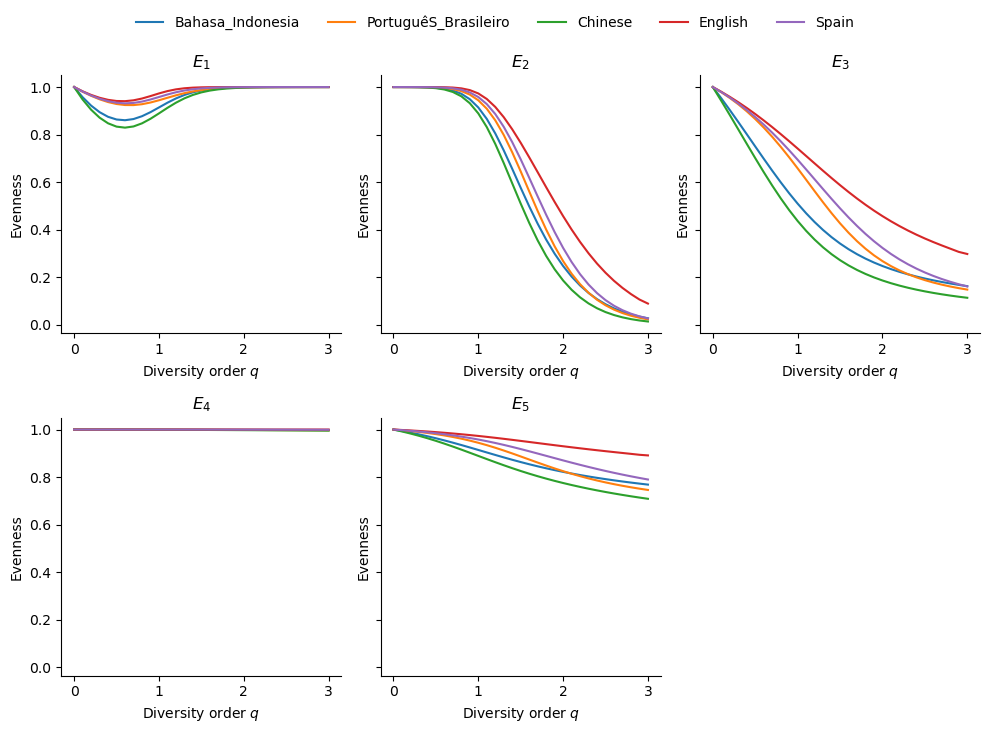

In [40]:
import matplotlib.pyplot as plt


from matplotlib.lines import Line2D

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 7), sharey=True)
axes = axes.flatten()

for i in range(1, 6):
    evennesses = {l:evenness(hill_est[l], E=i) for l in hill_est}
    ax = evenness_plot(evennesses, xlabel="Diversity order $q$", ylabel="Evenness", ax=axes[i-1])
    ax.set_title(f"$E_{i}$")
    ax.tick_params(axis='y', which='minor', left=True)
    ax.get_legend().remove()
axes[-1].remove()  # don't display empty ax

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc = 'upper center', ncol=6, bbox_to_anchor=(0.5, 1.05), frameon=False)

plt.tight_layout()

plt.savefig(f"../outputs/evenness-plots.pdf", bbox_inches='tight')

In [43]:
comp = []

for estimator in ['chao1', 'jackknife', 'ichao1', 'egghe_proot']:
    for category, assemblage in assemblages.items():
        surv = survival_ratio(assemblage, method=estimator, n_iter=1000)
        comp.append([category, estimator, surv['survival'], surv['lci'], surv['uci']])
        
comp = pd.DataFrame(comp, columns=['tradition', 'estimator', 'survival', 'lci', 'uci'])



  0%|                                                  | 0/1000 [00:00<?, ?it/s]

100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 1111.75it/s]


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 1125.30it/s]


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 1120.63it/s]


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

  0%|                                          | 1/1000 [00:00<12:25,  1.34it/s]

 22%|████████▋                              | 223/1000 [00:00<00:02, 357.84it/s]

 44%|█████████████████▎                     | 444/1000 [00:00<00:00, 703.37it/s]

 67%|█████████████████████████▎            | 666/1000 [00:01<00:00, 1022.15it/s]

100%|██████████████████████████████████████| 1000/1000 [00:01<00:00, 770.82it/s]


  0%|     

In [44]:
estimates = comp.sort_values(['tradition', 'estimator'])
estimates

tradition    estimator  survival       lci       uci
0        Bahasa_Indonesia        chao1  0.542876  0.507519  0.585061
15       Bahasa_Indonesia  egghe_proot  0.488978  0.448192  0.528535
10       Bahasa_Indonesia       ichao1  0.495110  0.461468  0.531977
5        Bahasa_Indonesia    jackknife  0.419820  0.383603  0.463588
2                 Chinese        chao1  0.502684  0.458457  0.548007
17                Chinese  egghe_proot  0.439061  0.388186  0.487356
12                Chinese       ichao1  0.458276  0.413844  0.503276
7                 Chinese    jackknife  0.354852  0.308425  0.417731
3                 English        chao1  0.471325  0.463961  0.478572
18                English  egghe_proot  0.444196  0.436396  0.452018
13                English       ichao1  0.422053  0.415692  0.428324
8                 English    jackknife  0.335568  0.327483  0.344063
1   PortuguêS_Brasileiro        chao1  0.318174  0.272198  0.368160
16  PortuguêS_Brasileiro  egghe_proot  0.305411  0.261359  0.355739
11  PortuguêS_Brasileiro       ichao1  0.301231  0.255484  0.351739
6   PortuguêS_Brasileiro    jackknife  0.276786  0.242754  0.321915
4                   Spain        chao1  0.397041  0.371243  0.423702
19                  Spain  egghe_proot  0.376568  0.350060  0.402219
14                  Spain       ichao1  0.353436  0.330161  0.377747
9                   Spain    jackknife  0.295522  0.274058  0.320634

In [45]:
estimates["estimator"] = estimates["estimator"].str.replace("_", " ")

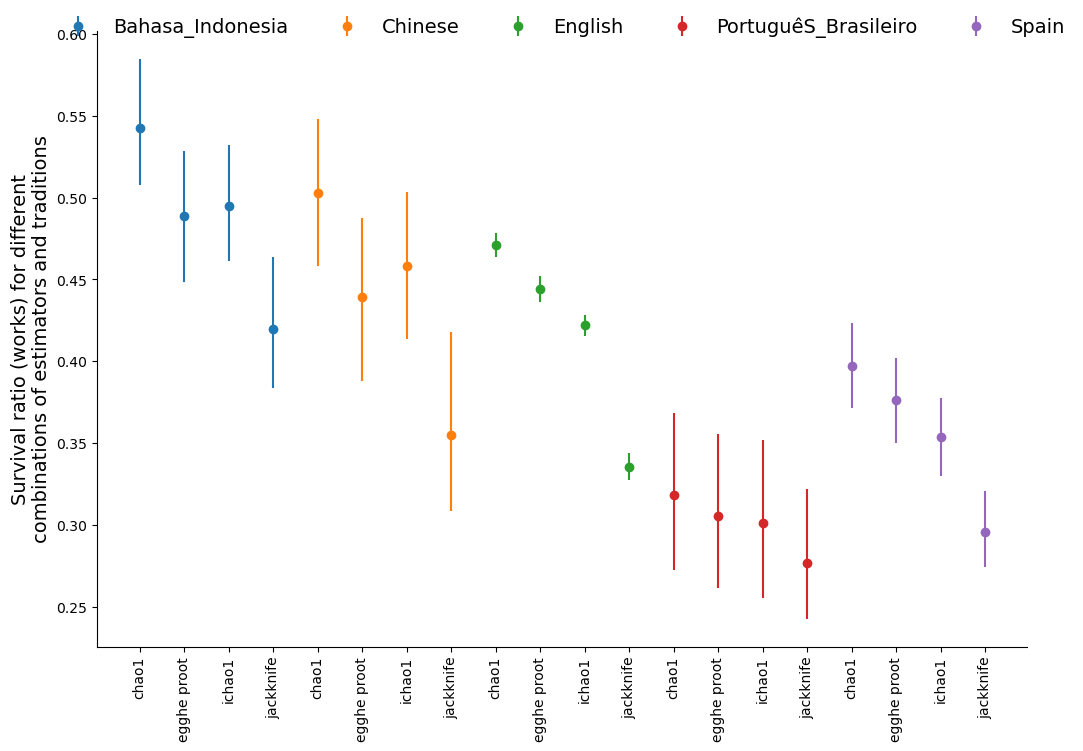

In [46]:
errors = np.array(list(zip(estimates['lci'], estimates['uci']))).T
errors[0] = estimates['survival'] - errors[0]
errors[1] -= estimates['survival']

fig, ax = plt.subplots(figsize=(12, 8))

traditions = sorted(set(estimates['tradition']))
color_dict = {t: f"C{i}" for i, t in enumerate(traditions)}
labeled = {t:False for t in color_dict}

for idx in range(len(estimates)):
    trad = estimates['tradition'].iloc[idx]
    meth = estimates['estimator'].iloc[idx]
    label = trad if not labeled[trad] else None
    c = color_dict[trad]
    labeled[trad] = True
    ax.errorbar(idx, estimates['survival'].iloc[idx],
        yerr=np.array([errors[:, idx]]).T,
        fmt='.', c=color_dict[trad], label=label,
        ms=12)


ax.set_ylabel('Survival ratio (works) for different\ncombinations of estimators and traditions', fontsize=14)
ax.set_xticks(np.arange(len(estimates)))
ax.set_xticklabels(estimates['estimator'], rotation = 90)
ax.tick_params(axis='x', which='minor', bottom=False)
ax.tick_params(axis='y', which='minor', left=True)
ax.legend(loc='upper center', ncol=len(assemblages), bbox_to_anchor=(0.5, 1.05), frameon=False, fontsize=14)

plt.savefig('../outputs/other.pdf');